# EDA YOUTUBE DAILY TRENDING DATASETS UNITED STATES

## IMPORT LIBRARY YANG DIPERLUKAN

In [1]:
# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import numpy
import numpy as np

# import seaborn
import seaborn as sns
%matplotlib inline

# import stats
from scipy import stats
import statistics

# ignore userwarning
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# import WordCloud
# conda install -c https://conda.anaconda.org/conda-forge wordcloud
from wordcloud import WordCloud

In [2]:
# import bokeh
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, BasicTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis11, Cividis11, Plasma11, Greys11

In [3]:
# load datasets US
dfUSvideos = pd.read_csv("datasets/USvideos.csv")
dfUScategory = pd.read_csv("datasets/USCategories.csv")

# set option agar float dapat ditampilkan seluruhnya
pd.set_option('float_format', '{:f}'.format)

## IDENTIFIKASI ATRIBUT DATA VIDEO UNITED STATES
Berikut adalah atribut data video dari region United States :

In [4]:
dfUSvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

#### Karena kolom trending_date pada semua data video adalah string dengan format year.month.day (contoh : 17.11.14), maka objek dari kolom tersebut perlu diubah menjadi bentuk datetime

In [5]:
dfUSvideos['trending_date'] =  pd.to_datetime(dfUSvideos['trending_date'], format='%y.%d.%m')

In [6]:
dfUSvideos.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [7]:
dfUSvideos.shape

(40949, 16)

Berdasarkan pengecekan data video dari region United States memiliki dimensi <b>40881 baris x 16 kolom</b>.

## DATA KATEGORI VIDEO REGION UNITED STATES
Berikut adalah data kategori video region United States setelah diubah menjadi dataframe :

In [8]:
dfUScategory

id               category
0    1       Film & Animation
1    2       Autos & Vehicles
2   10                  Music
3   15         Pets & Animals
4   17                 Sports
5   19        Travel & Events
6   20                 Gaming
7   22         People & Blogs
8   23                 Comedy
9   24          Entertainment
10  25        News & Politics
11  26          Howto & Style
12  27              Education
13  28   Science & Technology
14  29  Nonprofits & Activism
15  43                  Shows

In [9]:
dfUScategory.shape

(16, 2)

Berdasarkan pengecekan data kategori region United States memiliki dimensi <b>31 baris x 2 kolom</b>.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## A. STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME VIDEOS UNITED STATES
Kita perlu mengetahui statistik berikut untuk setiap kategori :
#### 1. Data tertinggi, terendah, dan rata-rata viewer
#### 2. Data tertinggi, terendah, dan rata-rata likes
#### 3. Data tertinggi, terendah, dan rata-rata dislikes
#### 5. Data tertinggi, terendah, dan rata-rata jumlah komentar

Di sini kita akan menemukan statistik data video dari region United States menggunakan list <b>gUSvideo</b> yang mana adalah list di mana video kelompokkan berdasarkan id kategori.<br/>

Untuk menemukan rata-rata digunakan fungsi <b>.max()</b> pada data grup id kategori yang diinginkan. Untuk menemukan value tertinggi digunakan <b>.max()</b> dan untuk menemukan value terkecil digunakan <b>.min()</b>

In [10]:
# mengelompokan berdasarkan id kategori
gUSvideo = dfUSvideos.groupby('category_id')

### 1A. Data tertinggi, terendah, dan rata-rata viewer United States

In [11]:
# memasukkan data ke dalam list
data_view_us = {
    
    # id kategori
    'id' : [items for items in dfUScategory['id']],
    #penonton tertinggi
    'highest_views':[gUSvideo.get_group(items)['views'].max() for items in dfUScategory['id']],
    
    #penonton terendah
    'lowest_views':[gUSvideo.get_group(items)['views'].min() for items in dfUScategory['id']],
    
    #penonton rata-rata
    'average_views':[gUSvideo.get_group(items)['views'].mean() for items in dfUScategory['id']],

    #median data
    'median_views':[gUSvideo.get_group(items)['views'].median() for items in dfUScategory['id']
                   ]}

dfViewUS = pd.DataFrame(data_view_us)

In [12]:
dfViewUS = pd.merge(dfUScategory,dfViewUS,on="id")

print("")
print("DATA VIEWER SETIAP KATEGORI DI REGION UNITED STATES")
dfViewUS


DATA VIEWER SETIAP KATEGORI DI REGION UNITED STATES


id               category  highest_views  lowest_views  average_views  \
0    1       Film & Animation       54863912           943 3106250.200853   
1    2       Autos & Vehicles       25244097          2860 1355965.408854   
2   10                  Music      225211923          1591 6201003.119592   
3   15         Pets & Animals        6187457          3393  831143.466304   
4   17                 Sports       29090799           658 2025969.030819   
5   19        Travel & Events       23932421           789  854619.611940   
6   20                 Gaming       16935442          1237 2620830.630355   
7   22         People & Blogs       56111957           884 1531835.428660   
8   23                 Comedy       29178096          1807 1480308.420017   
9   24          Entertainment      149376127           798 2067883.199016   
10  25        News & Politics       10277358           549  592587.737837   
11  26          Howto & Style       54155921          1107  983730.116739   
12  27              Education        7349435           773  712940.815217   
13  28   Science & Technology       42799458           983 1452626.745523   
14  29  Nonprofits & Activism       24286474          1456 2963884.070175   
15  43                  Shows        1445949         36609  903527.333333   

     median_views  
0  1274578.000000  
1   406278.000000  
2  1434128.000000  
3   444501.500000  
4   559352.000000  
5   494825.500000  
6  1494142.000000  
7   599139.000000  
8   980236.000000  
9   734704.000000  
10  244014.000000  
11  502783.000000  
12  419440.500000  
13  585748.000000  
14   73649.000000  
15 1155692.000000

In [13]:
# sort
dfViewUS_sortHighest = dfViewUS.sort_values(by="highest_views",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfViewUS_sortHighest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='highest_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Viridis11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='VIEWER TERTINGGI BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Viewer',  '@highest_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

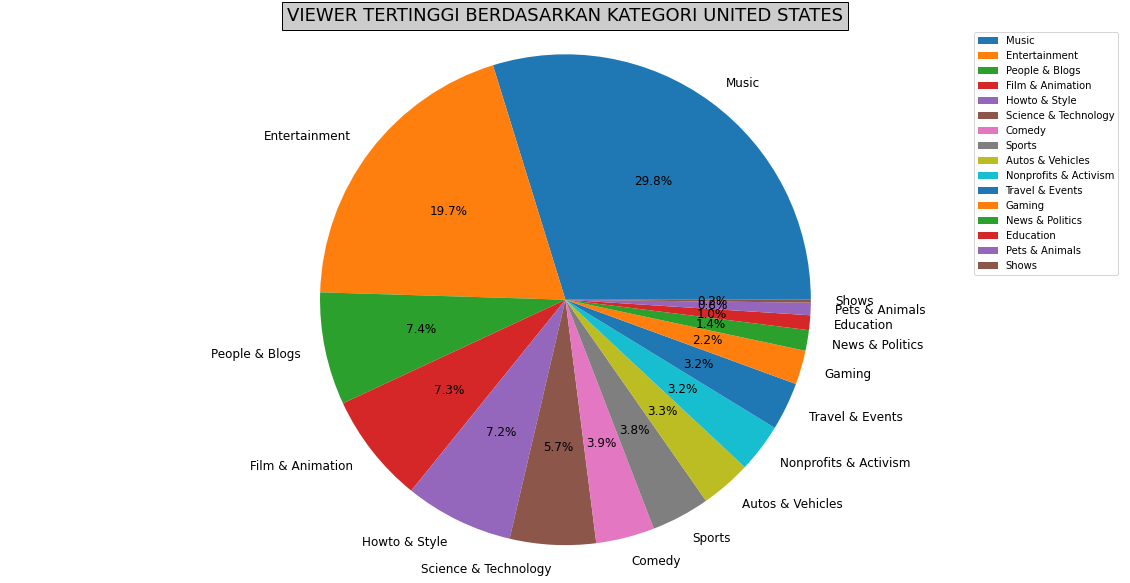

In [14]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewUS_sortHighest['highest_views'], labels=dfViewUS_sortHighest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("VIEWER TERTINGGI BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [15]:
# sort
dfViewUS_sortLowest = dfViewUS.sort_values(by="lowest_views",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfViewUS_sortLowest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='lowest_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Cividis11,
        factors=source.data['category'].tolist()
    )
)

# judul 
p.title.text ='VIEWER TERENDAH BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Viewer',  '@lowest_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

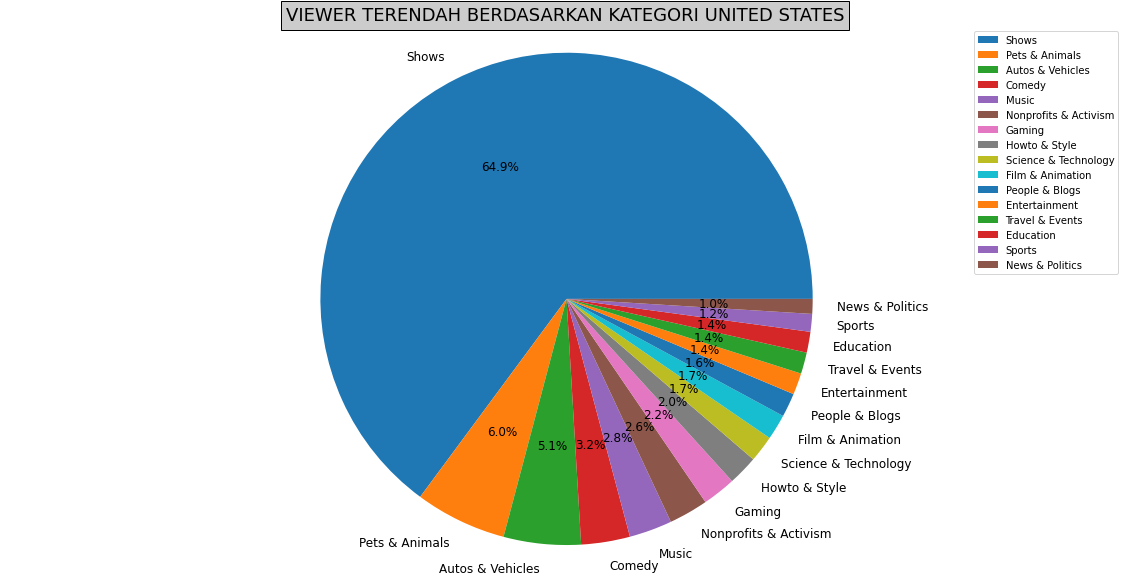

In [16]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewUS_sortLowest['lowest_views'], labels=dfViewUS_sortLowest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("VIEWER TERENDAH BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [17]:
# sort
dfViewUS_sortAvg = dfViewUS.sort_values(by="average_views",ascending=False)

# buat ColumnDataSource dari dataframe dfViewUS
source = ColumnDataSource(dfViewUS_sortAvg)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='average_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Plasma11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='VIEWER RATA-RATA BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Rata-rata Viewer',  '@average_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

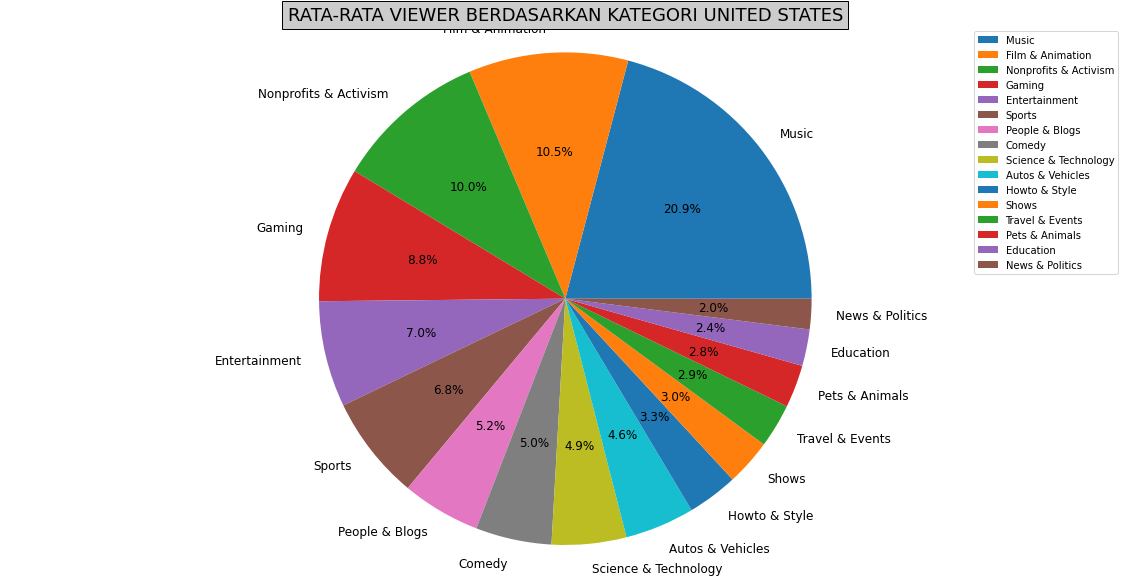

In [18]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewUS_sortAvg['average_views'], labels=dfViewUS_sortAvg['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("RATA-RATA VIEWER BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [19]:
# sort
dfViewUS_sortMedian = dfViewUS.sort_values(by="median_views",ascending=False)

# buat ColumnDataSource dari dataframe dfViewUS
source = ColumnDataSource(dfViewUS_sortMedian)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='median_views', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Greys11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='MEDIAN VIEWER BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Viewer'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Median Viewer',  '@median_views' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

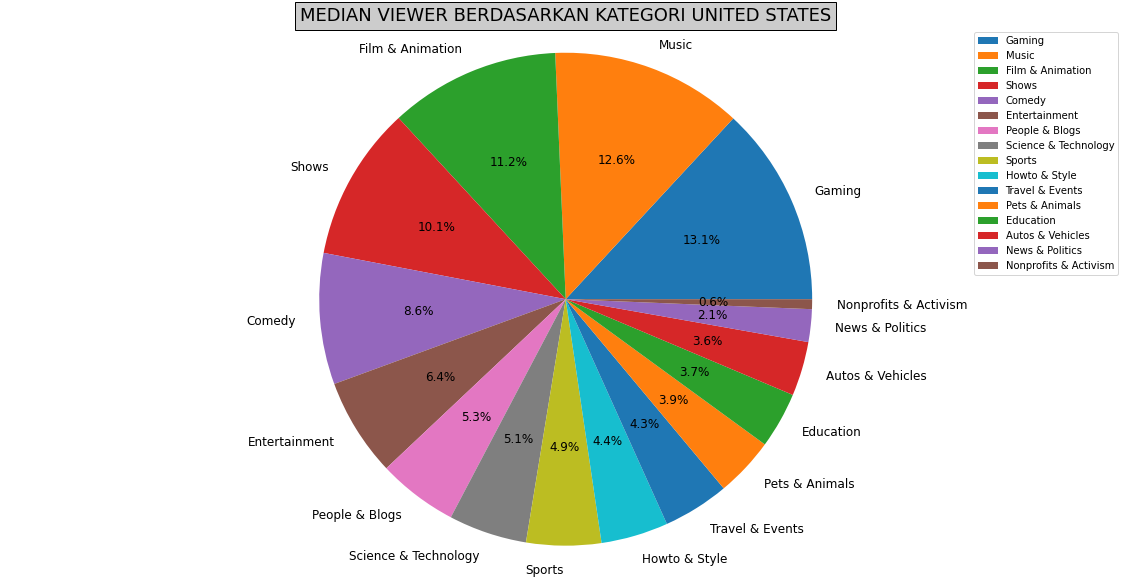

In [20]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfViewUS_sortMedian['median_views'], labels=dfViewUS_sortMedian['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("MEDIAN VIEWER BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

### 2A. Data tertinggi, terendah, dan rata-rata likes United States

In [21]:
# memasukkan data ke dalam list
data_likes_us = {
    
    'id' : [items for items in dfUScategory['id']],
    'highest_likes':[gUSvideo.get_group(items)['likes'].max() for items in dfUScategory['id']],
    'lowest_likes':[gUSvideo.get_group(items)['likes'].min() for items in dfUScategory['id']],
    'average_likes':[gUSvideo.get_group(items)['likes'].mean() for items in dfUScategory['id']],
    'median_likes':[gUSvideo.get_group(items)['likes'].median() for items in dfUScategory['id']
                   ]}

dfLikesUS = pd.DataFrame(data_likes_us)

In [22]:
dfLikesUS = pd.merge(dfUScategory,dfLikesUS,on="id")

print("")
print("DATA LIKES SETIAP KATEGORI DI REGION UNITED STATES")
dfLikesUS


DATA LIKES SETIAP KATEGORI DI REGION UNITED STATES


id               category  highest_likes  lowest_likes  average_likes  \
0    1       Film & Animation         922355             0   70787.836247   
1    2       Autos & Vehicles          97030             0   11056.395833   
2   10                  Music        5613827             0  218918.199011   
3   15         Pets & Animals         178243             6   21055.110870   
4   17                 Sports        1121217             0   45363.942502   
5   19        Travel & Events          42447             3   12030.462687   
6   20                 Gaming         444203             2   84502.183599   
7   22         People & Blogs        2032463             0   58135.825234   
8   23                 Comedy         865679             6   62582.223315   
9   24          Entertainment        3093544             0   53243.325070   
10  25        News & Politics         163338             0    7298.364696   
11  26          Howto & Style         605954             0   39286.076942   
12  27              Education         240989             0   29745.031401   
13  28   Science & Technology         564804             0   34374.276551   
14  29  Nonprofits & Activism        1988746             0  259923.614035   
15  43                  Shows          33261           810   18993.666667   

    median_likes  
0   25176.000000  
1    5916.000000  
2   62280.500000  
3   14431.500000  
4    5700.500000  
5   11634.000000  
6   51057.000000  
7   19438.000000  
8   30214.000000  
9   16234.000000  
10   1920.000000  
11  21492.500000  
12  13508.500000  
13  16328.000000  
14   2721.000000  
15  21537.000000

In [23]:
# sort
dfLikesUS_sortHighest = dfLikesUS.sort_values(by="highest_likes",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfLikesUS_sortHighest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='highest_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Viridis11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='LIKES TERTINGGI BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Likes',  '@highest_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

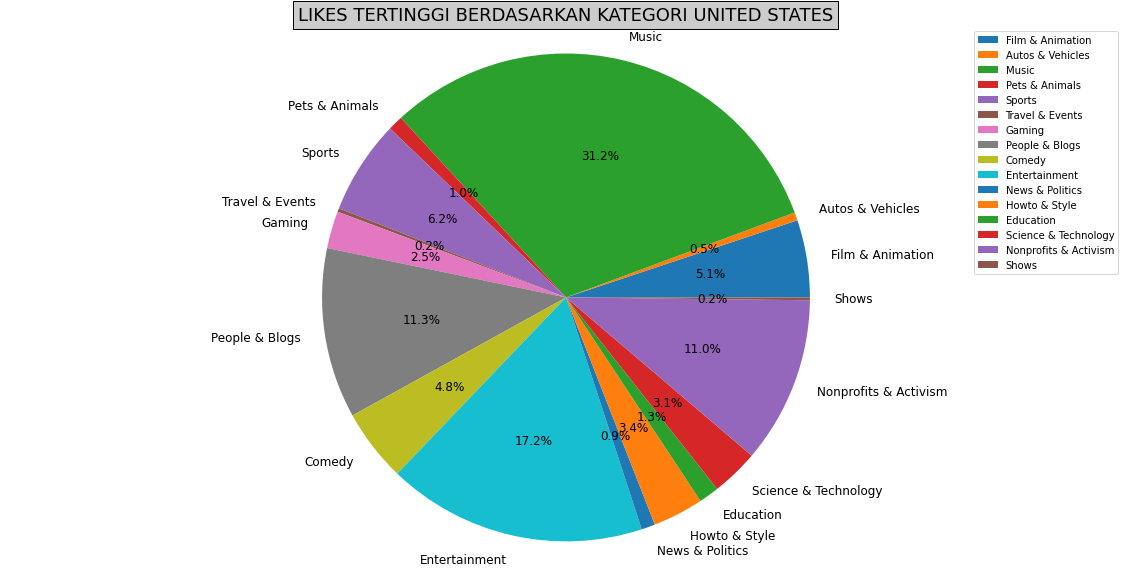

In [24]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesUS['highest_likes'], labels=dfLikesUS['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("LIKES TERTINGGI BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [25]:
# sort
dfLikesUS_sortLowest = dfLikesUS.sort_values(by="lowest_likes",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfLikesUS_sortLowest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='lowest_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Cividis11,
        factors=source.data['category'].tolist()
    )
)

# judul 
p.title.text ='LIKES TERENDAH BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Likes',  '@lowest_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

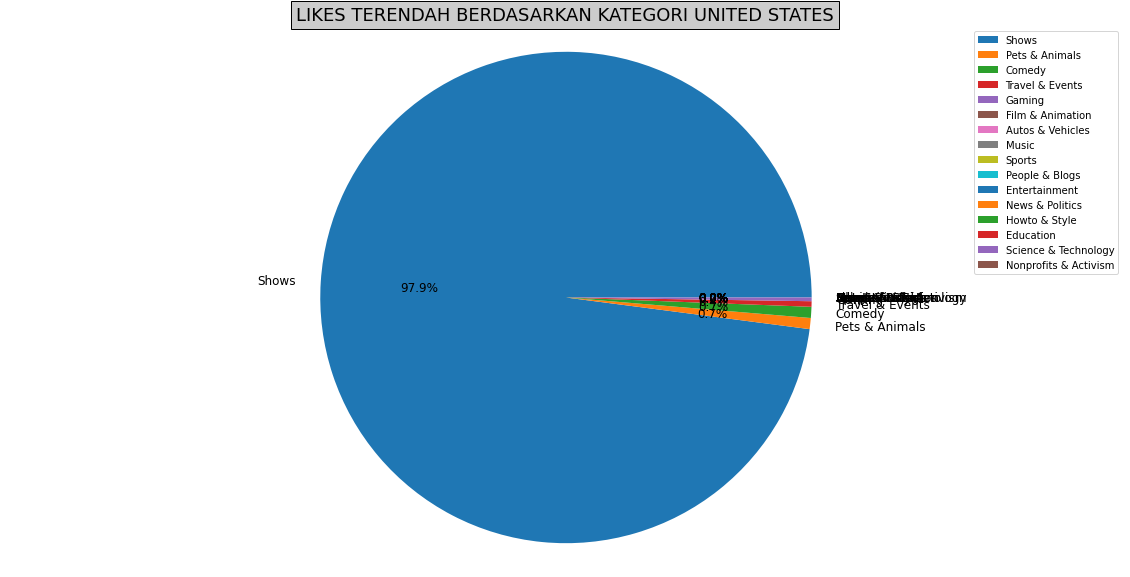

In [26]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesUS_sortLowest['lowest_likes'], labels=dfLikesUS_sortLowest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("LIKES TERENDAH BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [27]:
# sort
dfLikesUS_sortAvg = dfLikesUS.sort_values(by="average_likes",ascending=False)

# buat ColumnDataSource dari dataframe dfLikesUS
source = ColumnDataSource(dfLikesUS_sortAvg)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='average_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Plasma11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='LIKES RATA-RATA BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Rata-rata Viewer',  '@average_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

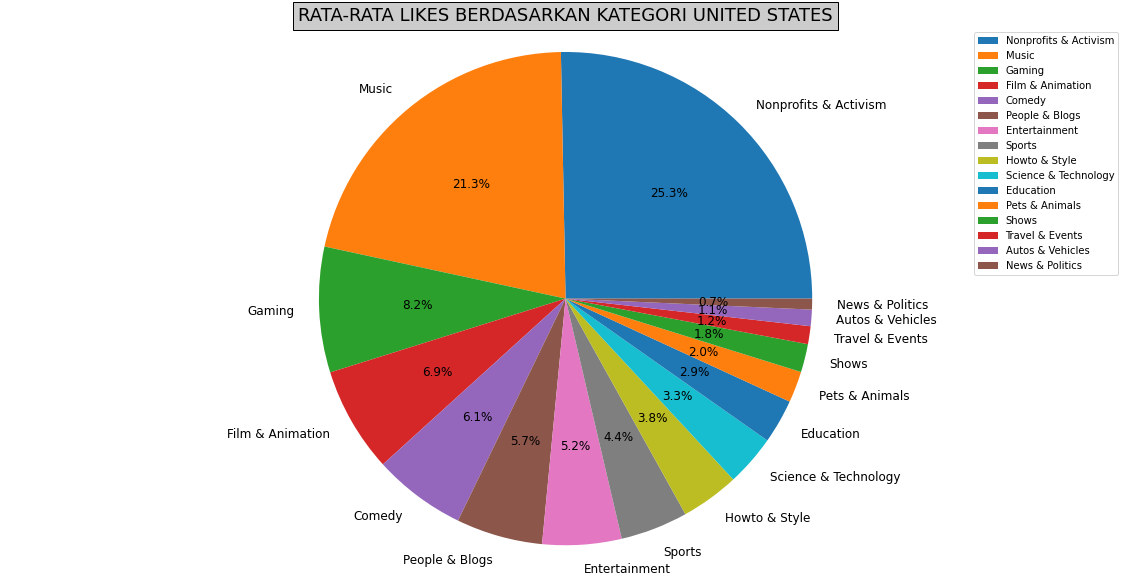

In [28]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesUS_sortAvg['average_likes'], labels=dfLikesUS_sortAvg['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("RATA-RATA LIKES BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [29]:
# sort
dfLikesUS_sortMedian = dfLikesUS.sort_values(by="median_likes",ascending=False)

# buat ColumnDataSource dari dataframe dfLikesUS
source = ColumnDataSource(dfLikesUS_sortMedian)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='median_likes', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Greys11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='MEDIAN LIKES BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Likes'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Median Viewer',  '@median_likes' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

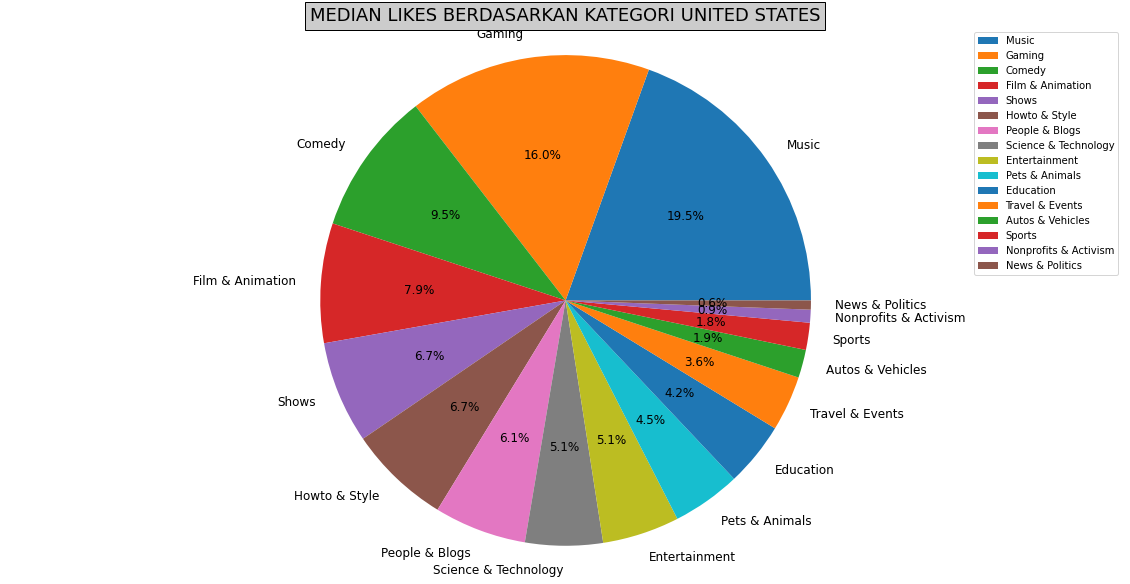

In [30]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfLikesUS_sortMedian['median_likes'], labels=dfLikesUS_sortMedian['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("MEDIAN LIKES BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

### 3B. Data tertinggi, terendah, dan rata-rata dislikes United States

In [31]:
# memasukkan data ke dalam list
data_dislikes_us = {
    
    'id' : [items for items in dfUScategory['id']],
    'highest_dislikes':[gUSvideo.get_group(items)['dislikes'].max() for items in dfUScategory['id']],
    'lowest_dislikes':[gUSvideo.get_group(items)['dislikes'].min() for items in dfUScategory['id']],
    'average_dislikes':[gUSvideo.get_group(items)['dislikes'].mean() for items in dfUScategory['id']],
    'median_dislikes':[gUSvideo.get_group(items)['dislikes'].median() for items in dfUScategory['id']
                   ]}

dfDislikesUS = pd.DataFrame(data_dislikes_us)

In [32]:
dfDislikesUS = pd.merge(dfUScategory,dfDislikesUS,on="id")

print("")
print("DATA DISLIKES SETIAP KATEGORI DI REGION UNITED STATES")
dfDislikesUS


DATA DISLIKES SETIAP KATEGORI DI REGION UNITED STATES


id               category  highest_dislikes  lowest_dislikes  \
0    1       Film & Animation             38082                0   
1    2       Autos & Vehicles             12290                0   
2   10                  Music            343541                0   
3   15         Pets & Animals              4899                0   
4   17                 Sports            176903                0   
5   19        Travel & Events              9000                0   
6   20                 Gaming            212976                0   
7   22         People & Blogs            228426                0   
8   23                 Comedy             29865                0   
9   24          Entertainment           1674420                0   
10  25        News & Politics            132439                0   
11  26          Howto & Style             66632                0   
12  27              Education             11270                0   
13  28   Science & Technology             47469                0   
14  29  Nonprofits & Activism            497847                0   
15  43                  Shows               616               66   

    average_dislikes  median_dislikes  
0        2590.681450      1022.000000  
1         632.838542       279.000000  
2        7907.757726      1243.500000  
3         573.238043       276.000000  
4        2361.339006       343.000000  
5         846.833333       351.000000  
6       11241.696450      1956.000000  
7        3173.800935       555.500000  
8        2091.521840       956.000000  
9        4314.297772       627.000000  
10       1680.759550       344.000000  
11       1320.284370       502.500000  
12        816.408213       397.000000  
13       1894.378176       589.000000  
14      58076.859649       122.000000  
15        429.964912       465.000000

### 4B. Data tertinggi, terendah, dan rata-rata jumlah komentar United States

In [33]:
# memasukkan data ke dalam list
data_comments_us = {
    
    'id' : [items for items in dfUScategory['id']],
    'highest_comments':[gUSvideo.get_group(items)['comment_count'].max() for items in dfUScategory['id']],
    'lowest_comments':[gUSvideo.get_group(items)['comment_count'].min() for items in dfUScategory['id']],
    'average_comments':[gUSvideo.get_group(items)['comment_count'].mean() for items in dfUScategory['id']],
    'median_comments':[gUSvideo.get_group(items)['comment_count'].median() for items in dfUScategory['id']
                   ]}

dfCommentsUS = pd.DataFrame(data_comments_us)

In [34]:
dfCommentsUS = pd.merge(dfUScategory,dfCommentsUS,on="id")

print("")
print("DATA COMMENTS SETIAP KATEGORI DI REGION UNITED STATES")
dfCommentsUS


DATA COMMENTS SETIAP KATEGORI DI REGION UNITED STATES


id               category  highest_comments  lowest_comments  \
0    1       Film & Animation            108849                0   
1    2       Autos & Vehicles             10591                0   
2   10                  Music           1228655                0   
3   15         Pets & Animals             44063                0   
4   17                 Sports             83660                0   
5   19        Travel & Events             13631                0   
6   20                 Gaming            144795                0   
7   22         People & Blogs            383762                0   
8   23                 Comedy             81051                0   
9   24          Entertainment           1361580                0   
10  25        News & Politics             38936                0   
11  26          Howto & Style            203884                0   
12  27              Education             28835                0   
13  28   Science & Technology            180913                0   
14  29  Nonprofits & Activism            658130                0   
15  43                  Shows              2181              220   

    average_comments  median_comments  
0        7627.744136      2636.000000  
1        2042.830729       916.000000  
2       19359.764524      3906.000000  
3        2892.070652      1173.000000  
4        5148.185373      1127.500000  
5        2267.440299      1674.500000  
6       18042.488372      8871.000000  
7        7719.013084      1678.000000  
8        6521.718831      2604.000000  
9        7383.229426      1693.500000  
10       2428.400885       866.000000  
11       5583.586589      1842.000000  
12       3286.378019      1466.500000  
13       4993.721783      1734.000000  
14      84364.859649       570.000000  
15       1668.719298      1648.000000

In [35]:
# sort
dfCommentsUS_sortHighest = dfCommentsUS.sort_values(by="highest_comments",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfCommentsUS_sortHighest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='highest_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Viridis11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='JUMLAH KOMENTAR TERTINGGI BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Komentar',  '@highest_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

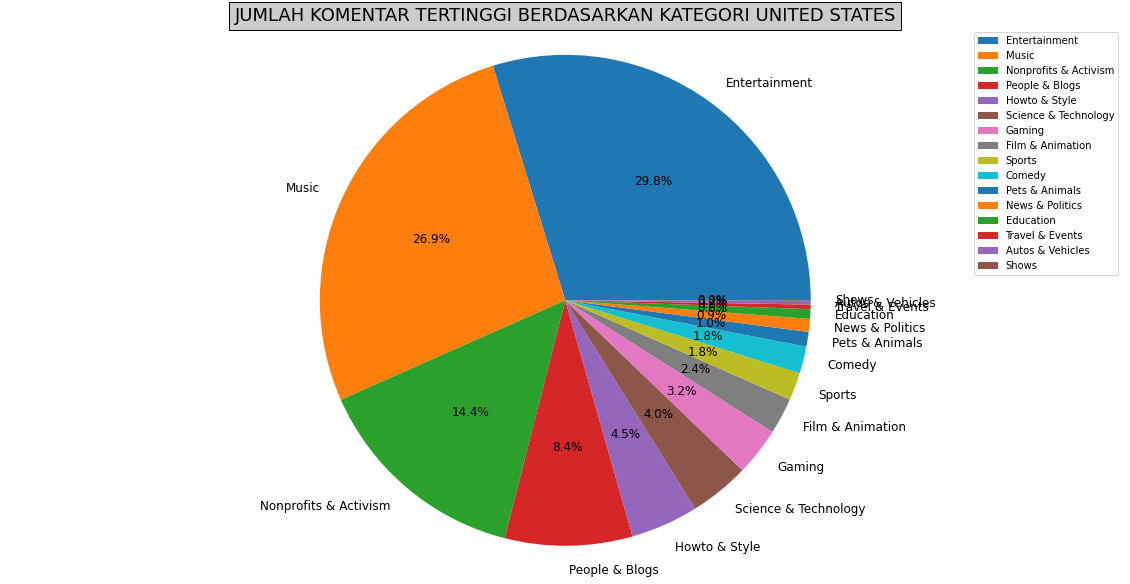

In [36]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsUS_sortHighest['highest_comments'], labels=dfCommentsUS_sortHighest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR TERTINGGI BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [37]:
# sort
dfCommentsUS_sortLowest = dfCommentsUS.sort_values(by="lowest_comments",ascending=False)

# buat ColumnDataSource dari dataframe
source = ColumnDataSource(dfCommentsUS_sortLowest)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='lowest_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Cividis11,
        factors=source.data['category'].tolist()
    )
)

# judul 
p.title.text ='JUMLAH KOMENTAR TERENDAH BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Jumlah Komentar',  '@lowest_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

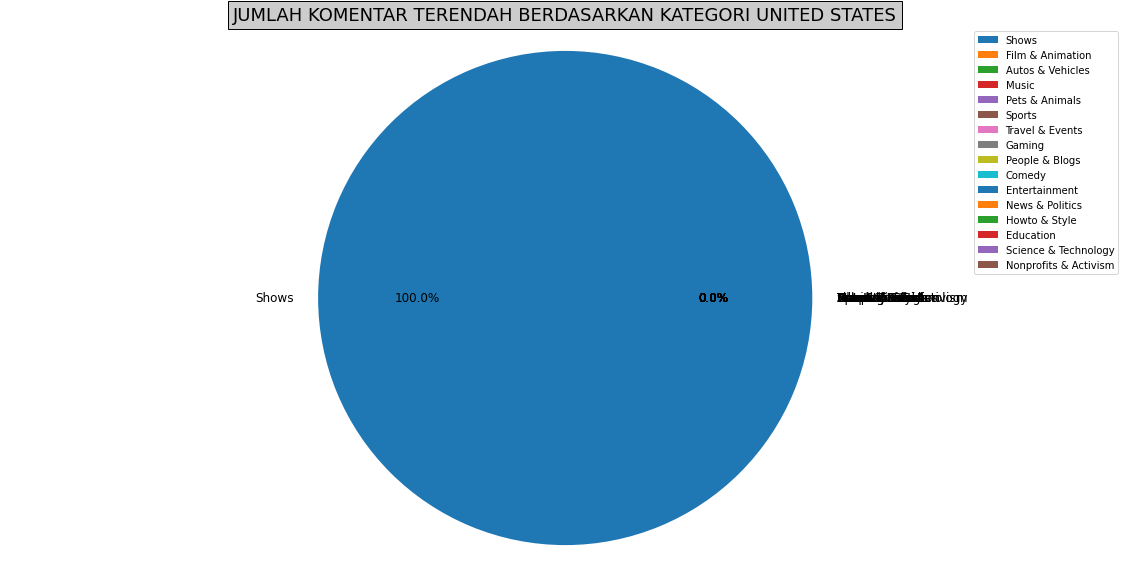

In [38]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

explode = (0.1, 0, 0, 0, 0, 0)  

ax1.pie(dfCommentsUS_sortLowest['lowest_comments'], labels=dfCommentsUS_sortLowest['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR TERENDAH BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [39]:
# sort
dfCommentsUS_sortAvg = dfCommentsUS.sort_values(by="average_comments",ascending=False)

# buat ColumnDataSource dari dataframe dfCommentsUS
source = ColumnDataSource(dfCommentsUS_sortAvg)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='average_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Plasma11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='JUMLAH KOMENTAR RATA-RATA BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Rata-rata Komentar',  '@average_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

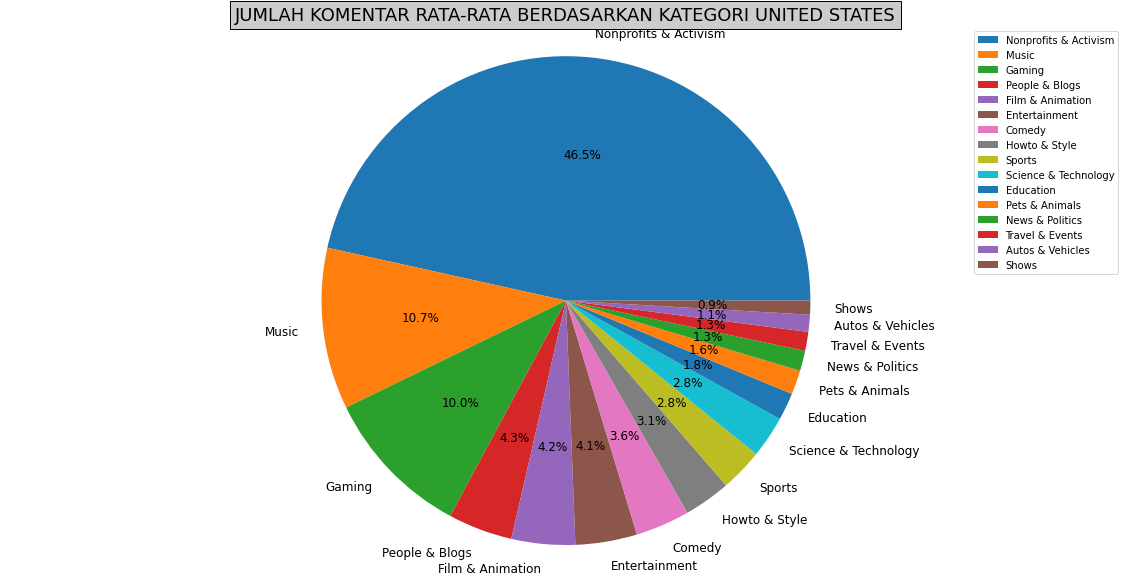

In [40]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsUS_sortAvg['average_comments'], labels=dfCommentsUS_sortAvg['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR RATA-RATA BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

In [41]:
# sort
dfCommentsUS_sortMedian = dfCommentsUS.sort_values(by="median_comments",ascending=False)

# buat ColumnDataSource dari dataframe dfCommentsUS
source = ColumnDataSource(dfCommentsUS_sortMedian)

# pembuatan Figure
p = figure (
    x_range = source.data['category'].tolist()
)

# plotting dengan vbar
p.vbar(
    x='category', 
    top='median_comments', 
    source=source, 
    width=0.7,
    fill_color=factor_cmap(
        'category',
        palette=Greys11,
        factors=source.data['category'].tolist()
    )
)

# judul
p.title.text ='MEDIAN KOMENTAR BERDASARKAN KATEGORI UNITED STATES'
p.title.align = 'center'
p.title.text_font_size = '14pt'
p.title.text_font = "times"

# pembuatan x-axis dan orientasinya
p.xaxis.axis_label = 'Kategori'
p.xaxis.major_label_orientation = 1
p.xaxis.axis_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "11pt"
p.xaxis.axis_label_text_font = "times"

# pembuatan y-axis
p.yaxis.axis_label = 'Jumlah Komentar'
p.yaxis.axis_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "9pt"
p.yaxis.axis_label_text_font = "times"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)

# setingan tinggi dan lebar figure
p.width = 900
p.height = 700

# seting hover
hover = HoverTool(
  tooltips=[
    ('Kategori',   '@category'),
    ('Median Komentar',  '@median_comments' )
  ]
)
p.add_tools(hover)

# output
output_notebook()
show(p)
reset_output()

Loading BokehJS ...

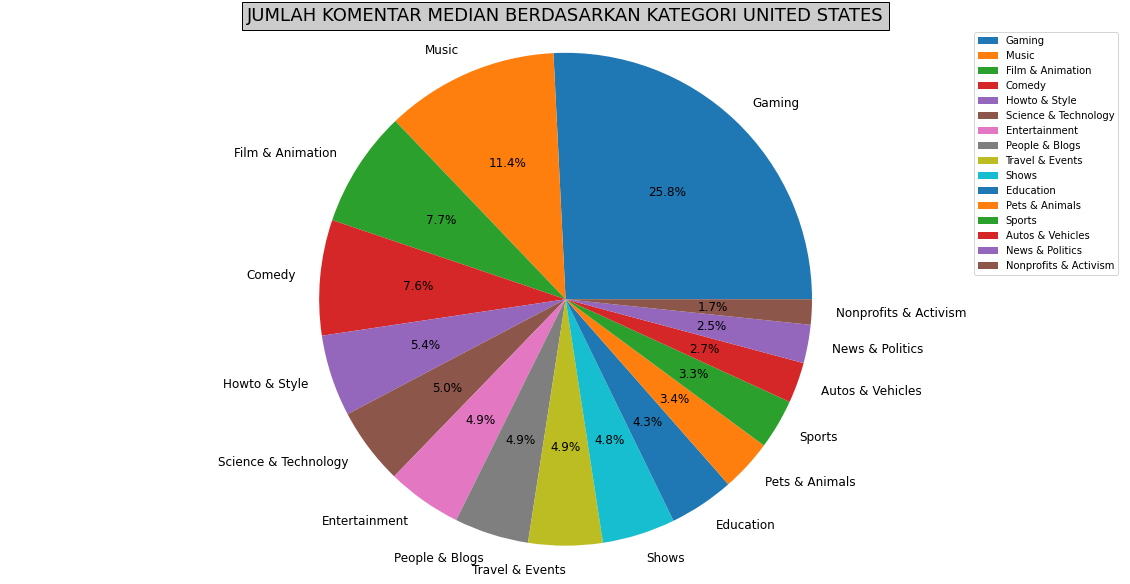

In [42]:
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax1.pie(dfCommentsUS_sortMedian['median_comments'], labels=dfCommentsUS_sortMedian['category'], autopct='%1.1f%%', textprops={'fontsize': 12})
ax1.axis('equal') 

# legend
ax1.legend(loc="topright")

plt.title("JUMLAH KOMENTAR MEDIAN BERDASARKAN KATEGORI UNITED STATES", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")

plt.show()

### 5B. Melihat tag yang paling sering masuk trending di United States

Di sini akan ditelaah tag apa yang paling sering digunakan oleh pengunggah video dan divisualisasikan dengan Word Cloud. 

Kolom tags akan dijadikan list untuk kemudian dilakukan join dan dikonversi menjadi string. Kemudian dilakukan split & strip untuk mendapatkan tags yang diinginkan

In [43]:
# kolom tags tolist()
list_tags_us = dfUSvideos['tags'].tolist()

list_tags_us

['SHANtell martin',
 'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"',
 'racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver\'s License | Lele Pons"',
 'rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"',
 'ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no

list_tags_us akan disatukan dengan fungsi join() agar menjadi string. String baru dengan nama string_tags_ca perlu dibuat terlebih dahulu dengan isi "|" agar "|" bertindak sebagai separator antar isi dari list setelah dilakukan join().

In [44]:
string_tags_us = "|"

In [45]:
string_tags_us = string_tags_us.join(list_tags_us)

Setelah dilakukan join, karakter " atau double quote perlu dihilangkan dengan fungsi replace()

In [46]:
string_tags_us = string_tags_us.replace('"', '')

String dikonversi menjadi lowercase untuk mempermudah penghitungan nantinya.

In [47]:
string_tags_us = string_tags_us.lower()

Kemudian fungsi split dilakukan terhadap karakter "|" untuk memisahkan antar teks dalam string tersebut dan menjadikannya array string.

In [48]:
string_tags_us = string_tags_us.split("|")

string_tags_us

['shantell martin',
 'last week tonight trump presidency',
 'last week tonight donald trump',
 'john oliver trump',
 'donald trump',
 'racist superman',
 'rudy',
 'mancuso',
 'king',
 'bach',
 'racist',
 'superman',
 'love',
 'rudy mancuso poo bear black white official music video',
 'iphone x by pineapple',
 'lelepons',
 'hannahstocking',
 'rudymancuso',
 'inanna',
 'anwar',
 'sarkis',
 'shots',
 'shotsstudios',
 'alesso',
 'anitta',
 'brazil',
 "getting my driver's license ",
 ' lele pons',
 'rhett and link',
 'gmm',
 'good mythical morning',
 'rhett and link good mythical morning',
 'good mythical morning rhett and link',
 'mythical morning',
 'season 12',
 'nickelback lyrics',
 'nickelback lyrics real or fake',
 'nickelback',
 'nickelback songs',
 'nickelback song',
 'rhett link nickelback',
 'gmm nickelback',
 'lyrics (website category)',
 'nickelback (musical group)',
 'rock',
 'music',
 'lyrics',
 'chad kroeger',
 'canada',
 'music (industry)',
 'mythical',
 'gmm challenge',
 'c

In [49]:
# membuat kolom bernama tag yang berisikan array string string_tags_us
dfUSvideos_tags = pd.DataFrame(string_tags_us, columns=['tag'])

In [50]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali tag muncul dalam datasets dfUSvdideos_tags
dfUSvideos_tags_count = pd.DataFrame(dfUSvideos_tags.tag.value_counts().reset_index())

#reset index dari 1
dfUSvideos_tags_count.index = dfUSvideos_tags_count.index + 1

#rename kolom
dfUSvideos_tags_count.columns = ['tag', 'tag_count']

print("TOP 5 TAG DI KATEGORI MUSIC UNITED STATES")
dfUSvideos_tags_count.head(5)

TOP 5 TAG DI KATEGORI MUSIC UNITED STATES


tag  tag_count
1   funny       4142
2  comedy       3647
3  how to       1702
4   music       1664
5     pop       1634

#### Memvisualisasikan tag yang paling sering muncul di United States

Untuk memvisualisasikan tag-tag yang paling sering muncul, digunakan <b>WordCloud</b>.

WordCloud dapat membaca dictionary yang berisikan teksnya lalu frekuensinya.

Langkah pertama adalah mengkonversi dfCAmusic_tags_count menjadi dictionary. Dictionary terdiri dari data yang berasal dari kolom tag dan tag_count pada dataframe dfCAvideos_tags_count

In [51]:
# pembuatan dictionary yang berasal dari dataframe
dict_tags_US = dict(zip(dfUSvideos_tags_count['tag'].tolist(), dfUSvideos_tags_count['tag_count'].tolist()))

dict_tags_US

{'funny': 4142,
 'comedy': 3647,
 'how to': 1702,
 'music': 1664,
 'pop': 1634,
 '[none]': 1535,
 'trailer': 1413,
 'food': 1280,
 '2018': 1275,
 'news': 1254,
 'review': 1239,
 'makeup': 1238,
 'science': 1237,
 'humor': 1210,
 'celebrity': 1130,
 'diy': 1110,
 'tutorial': 1054,
 'video': 1031,
 'television': 1024,
 'live': 1020,
 'interview': 988,
 'vlog': 958,
 'entertainment': 951,
 'animation': 947,
 'beauty': 923,
 'movie': 908,
 'official': 896,
 'comedian': 879,
 'cooking': 864,
 'fun': 849,
 'hollywood': 847,
 'cute': 829,
 'buzzfeed': 804,
 'celebrities': 788,
 'talk show': 788,
 'late night': 783,
 'recipe': 778,
 'nbc': 760,
 'family friendly': 754,
 'sports': 752,
 'animals': 723,
 'best': 718,
 'music video': 712,
 'education': 711,
 'movies': 696,
 'fashion': 696,
 'challenge': 688,
 'records': 685,
 '2017': 676,
 'funny video': 675,
 'basketball': 655,
 'nba': 634,
 'jokes': 634,
 'film': 628,
 'marvel': 622,
 'technology': 619,
 'makeup tutorial': 608,
 'family': 604,


In [52]:
wc = WordCloud(width=800, height=600, background_color ='white').generate_from_frequencies(dict_tags_US)

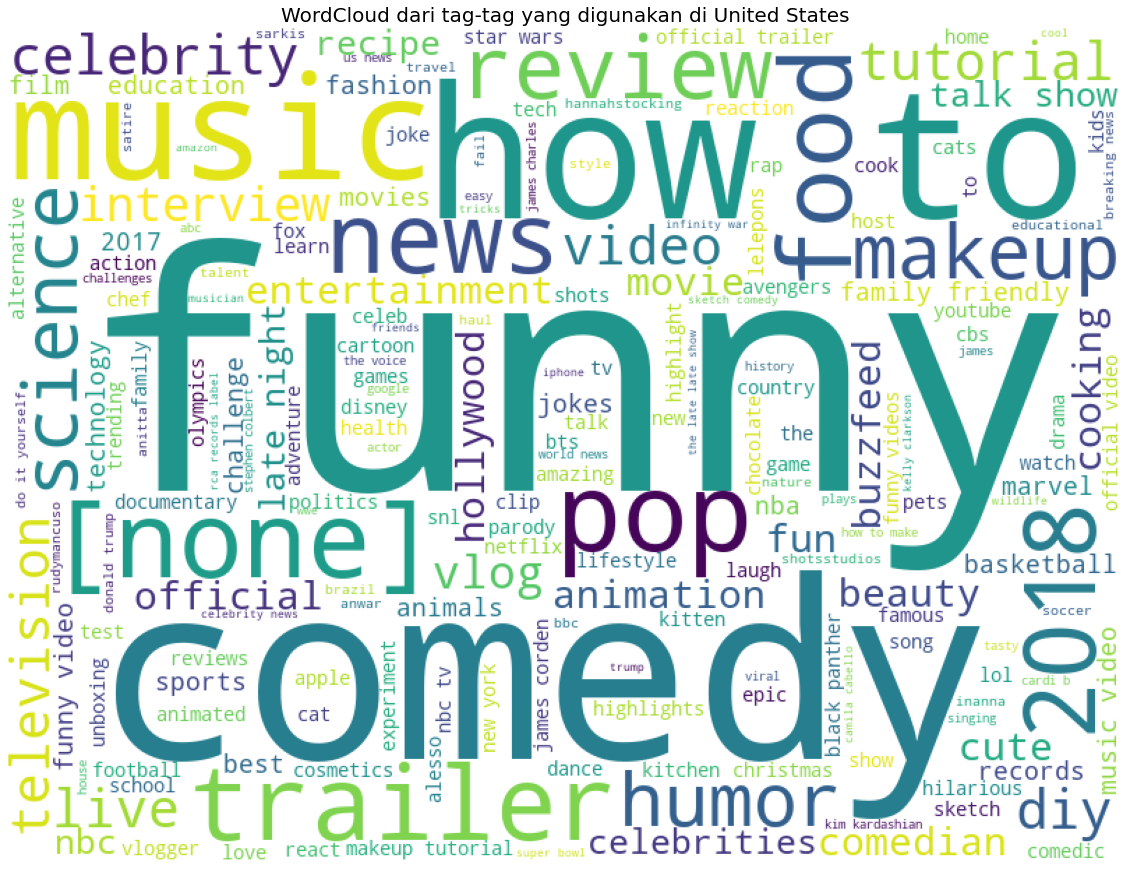

In [53]:
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud dari tag-tag yang digunakan di United States", fontsize=20)

plt.show()

### Melihat tag yang paling sering digunakan di kategori 'Music' di United States

Kategori 'Music' di sini dipilih karena kategori ini memiliki viewer rata-rata tertinggi, median viewer yang berada di peringkat dua, serta jumlah rata-rata likes tertinggi di Great Britain

In [54]:
# membuat dataframe baru berisi video-video dengan kategori 'Music' dengan category_id 10
dfUSmusic = dfUSvideos[dfUSvideos['category_id'] == 10]

In [55]:
dfUSmusic

video_id trending_date  \
12     5E4ZBSInqUU    2017-11-14   
32     n1WpP7iowLc    2017-11-14   
37     e_7zHm7GsYc    2017-11-14   
39     zZ9FciUx6gs    2017-11-14   
40     PaJCFHXcWmM    2017-11-14   
...            ...           ...   
40935  2in8XqiElwc    2018-06-14   
40938  n_W54baizX8    2018-06-14   
40939  pcJo0tIWybY    2018-06-14   
40941  7UoP9ABJXGE    2018-06-14   
40942  ju_inUnrLc4    2018-06-14   

                                                   title     channel_title  \
12            Marshmello - Blocks (Official Music Video)        marshmello   
32            Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
37     Hunter Hayes - You Should Be Loved (Part One O...      Hunter Hayes   
39     Nickelback - The Betrayal Act III [Official Vi...        Nickelback   
40                                     U2 - The Blackout            U2VEVO   
...                                                  ...               ...   
40935         Nicki Minaj - Chun-Li (Live on SNL / 2018)  NickiMinajAtVEVO   
40938               Daddy Yankee - Hielo (Video Oficial)      Daddy Yankee   
40939    SZA - Garden (Say It Like Dat) (Official Video)           SZAVEVO   
40941            Dan + Shay - Speechless (Wedding Video)      Dan And Shay   
40942              Fifth Harmony - Don't Say You Love Me  FifthHarmonyVEVO   

       category_id              publish_time  \
12              10  2017-11-13T17:00:00.000Z   
32              10  2017-11-10T17:00:03.000Z   
37              10  2017-11-13T15:01:18.000Z   
39              10  2017-11-13T15:31:44.000Z   
40              10  2017-11-13T17:00:04.000Z   
...            ...                       ...   
40935           10  2018-05-20T07:53:59.000Z   
40938           10  2018-05-18T14:00:04.000Z   
40939           10  2018-05-18T14:00:04.000Z   
40941           10  2018-05-18T04:04:58.000Z   
40942           10  2018-05-18T07:00:08.000Z   

                                                    tags     views   likes  \
12     marshmello|"blocks"|"marshmello blocks"|"block...    687582  114188   
32     Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158531  787419   
37     Hunter|"Hayes"|"you should be loved"|"the shad...     13917    1318   
39     Nickelback|"Feed The Machine"|"The Betrayal Ac...     57169    6927   
40         U2|"The"|"Blackout"|"Island"|"Records"|"Rock"     60506    5389   
...                                                  ...       ...     ...   
40935  Nicki Minaj new music|"Nicki Minaj Queen"|"Nic...   4945185  189265   
40938  daddy yankee reggaeton|"daddy yankee youtube"|...  41803845  628861   
40939  Garden (Say It Like Dat)|"R&B"|"SZA"|"Top Dawg...   6004782  210802   
40941  wedding video|"heartfelt wedding video"|"emoti...   5534278   45128   
40942  fifth hamony|"harmonizers"|"lauren"|"ally"|"no...  23502572  676467   

       dislikes  comment_count  \
12         1333           8371   
32        43420         125882   
37           24             76   
39          161            565   
40          106            455   
...         ...            ...   
40935      9406          18683   
40938     42833          39363   
40939      4166          15169   
40941      1591            806   
40942     15993          52432   

                                       thumbnail_link  comments_disabled  \
12     https://i.ytimg.com/vi/5E4ZBSInqUU/default.jpg              False   
32     https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
37     https://i.ytimg.com/vi/e_7zHm7GsYc/default.jpg              False   
39     https://i.ytimg.com/vi/zZ9FciUx6gs/default.jpg              False   
40     https://i.ytimg.com/vi/PaJCFHXcWmM/default.jpg              False   
...                                               ...                ...   
40935  https://i.ytimg.com/vi/2in8XqiElwc/default.jpg              False   
40938  https://i.ytimg.com/vi/n_W54baizX8/default.jpg              False   
40939  https://i.ytimg.com/vi/pcJ

Kolom tags akan dijadikan list untuk kemudian dilakukan join dan dikonversi menjadi string. Kemudian dilakukan split & strip untuk mendapatkan tags yang diinginkan

In [56]:
# kolom tags tolist()
list_tags_music_us = dfUSmusic['tags'].tolist()

list_tags_music_us

['marshmello|"blocks"|"marshmello blocks"|"blocks music video"|"marshmello music video"|"roblox bully story"|"marshmello alone"|"roblox"|"cuphead"|"marshmello nightcore"|"marshmello musically"|"music for kids"|"happy music"|"videos that make you happy"|"sad songs"|"childrens music"|"joytime"|"marshmello joytime"|"frat bro"|"band"|"high school"|"crush"|"mellogang"',
 'Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap"',
 'Hunter|"Hayes"|"you should be loved"|"the shadowboxers"|"pictures"|"part one"|"official"|"music video"|"trilogy"|"hunter hayes"|"wanted"|"i want crazy"|"storm warning"',
 'Nickelback|"Feed The Machine"|"The Betrayal Act III"|"The Betrayal"|"Rock"|"Alternative"|"Anthem Films"|"Kevin Slack"|"Chad Kroeger"|"Ryan Peake"|"Mike Kroeger"|"Daniel Adair"|"How You Remind Me"|"Rockstar"',
 'U2|"The"|"Blackout"|"Island"|"Records"|"Rock"',
 'matthew santoro facts|"music video"|"matthew santoro"|"Ellevan"|"EllevanMusic"|"HumbleThePoet"|"Humble The Poet"|"FACTS"|"whats tha

list_tags_us akan disatukan dengan fungsi join() agar menjadi string. String baru dengan nama string_tags_music_us perlu dibuat terlebih dahulu dengan isi "|" agar "|" bertindak sebagai separator antar isi dari list setelah dilakukan join().

In [57]:
string_tags_music_us= "|"

In [58]:
string_tags_music_us = string_tags_music_us.join(list_tags_music_us).replace('"', '').lower().split("|")

In [59]:
string_tags_music_us

['marshmello',
 'blocks',
 'marshmello blocks',
 'blocks music video',
 'marshmello music video',
 'roblox bully story',
 'marshmello alone',
 'roblox',
 'cuphead',
 'marshmello nightcore',
 'marshmello musically',
 'music for kids',
 'happy music',
 'videos that make you happy',
 'sad songs',
 'childrens music',
 'joytime',
 'marshmello joytime',
 'frat bro',
 'band',
 'high school',
 'crush',
 'mellogang',
 'eminem',
 'walk',
 'on',
 'water',
 'aftermath/shady/interscope',
 'rap',
 'hunter',
 'hayes',
 'you should be loved',
 'the shadowboxers',
 'pictures',
 'part one',
 'official',
 'music video',
 'trilogy',
 'hunter hayes',
 'wanted',
 'i want crazy',
 'storm warning',
 'nickelback',
 'feed the machine',
 'the betrayal act iii',
 'the betrayal',
 'rock',
 'alternative',
 'anthem films',
 'kevin slack',
 'chad kroeger',
 'ryan peake',
 'mike kroeger',
 'daniel adair',
 'how you remind me',
 'rockstar',
 'u2',
 'the',
 'blackout',
 'island',
 'records',
 'rock',
 'matthew santoro f

In [60]:
# membuat kolom bernama tag yang berisikan array string string_tags_us
dfUSmusic_tags = pd.DataFrame(string_tags_music_us, columns=['tag'])

In [61]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali tag muncul dalam datasets dfUSmusic_tags
dfUSmusic_tags_count = pd.DataFrame(dfUSmusic_tags.tag.value_counts().reset_index())

#reset index dari 1
dfUSmusic_tags_count.index = dfUSmusic_tags_count.index + 1

#rename kolom
dfUSmusic_tags_count.columns = ['tag', 'tag_count']

print("TOP 5 TAG DI KATEGORI MUSIC UNITED STATES")
dfUSmusic_tags_count.head(5)

TOP 5 TAG DI KATEGORI MUSIC UNITED STATES


tag  tag_count
1          pop       1511
2      records        658
3        music        650
4  music video        500
5     official        425

#### Memvisualisasikan tag yang paling sering muncul di kategori Music negara United States

Untuk memvisualisasikan tag-tag yang paling sering muncul, digunakan <b>WordCloud</b>.

WordCloud dapat membaca dictionary yang berisikan teksnya lalu frekuensinya.

Langkah pertama adalah mengkonversi dfUSmusic_tags_count menjadi dictionary. Dictionary terdiri dari data yang berasal dari kolom tag dan tag_count pada dataframe dfUSmusic_tags_count

In [62]:
# pembuatan dictionary yang berasal dari dataframe music
dict_tags_music_US = dict(zip(dfUSmusic_tags_count['tag'].tolist(), dfUSmusic_tags_count['tag_count'].tolist()))

dict_tags_music_US

{'pop': 1511,
 'records': 658,
 'music': 650,
 'music video': 500,
 'official': 425,
 'alternative': 362,
 'live': 358,
 'country': 346,
 'official video': 317,
 'rca records label': 280,
 'the': 256,
 'rap': 255,
 'r&b': 234,
 'lyrics': 231,
 'dance': 229,
 'rock': 221,
 'song': 204,
 'atlantic records': 200,
 'bts': 195,
 'camila cabello': 194,
 'hip hop': 188,
 'capitol': 187,
 'island': 173,
 'new music': 166,
 'remix': 163,
 'cover': 160,
 '[none]': 158,
 'you': 156,
 '2018': 155,
 'fifth harmony': 151,
 'edm': 151,
 'the voice': 147,
 'nashville': 146,
 'acoustic': 142,
 'columbia': 136,
 'ed sheeran': 132,
 'diplo': 131,
 'khalid': 128,
 '방탄소년단': 128,
 'album': 128,
 'new song': 127,
 'bangtan': 127,
 'taylor swift': 123,
 'electronic': 123,
 'pop music': 123,
 'machine': 122,
 'shawn mendes': 121,
 'love': 119,
 'meghan trainor': 118,
 'american idol': 118,
 'charlie puth': 117,
 '2017': 117,
 'no': 114,
 'new': 110,
 'house': 110,
 'lyric video': 108,
 'dua lipa': 108,
 'inter

In [63]:
wc = WordCloud(width=800, height=600, background_color ='white').generate_from_frequencies(dict_tags_music_US)

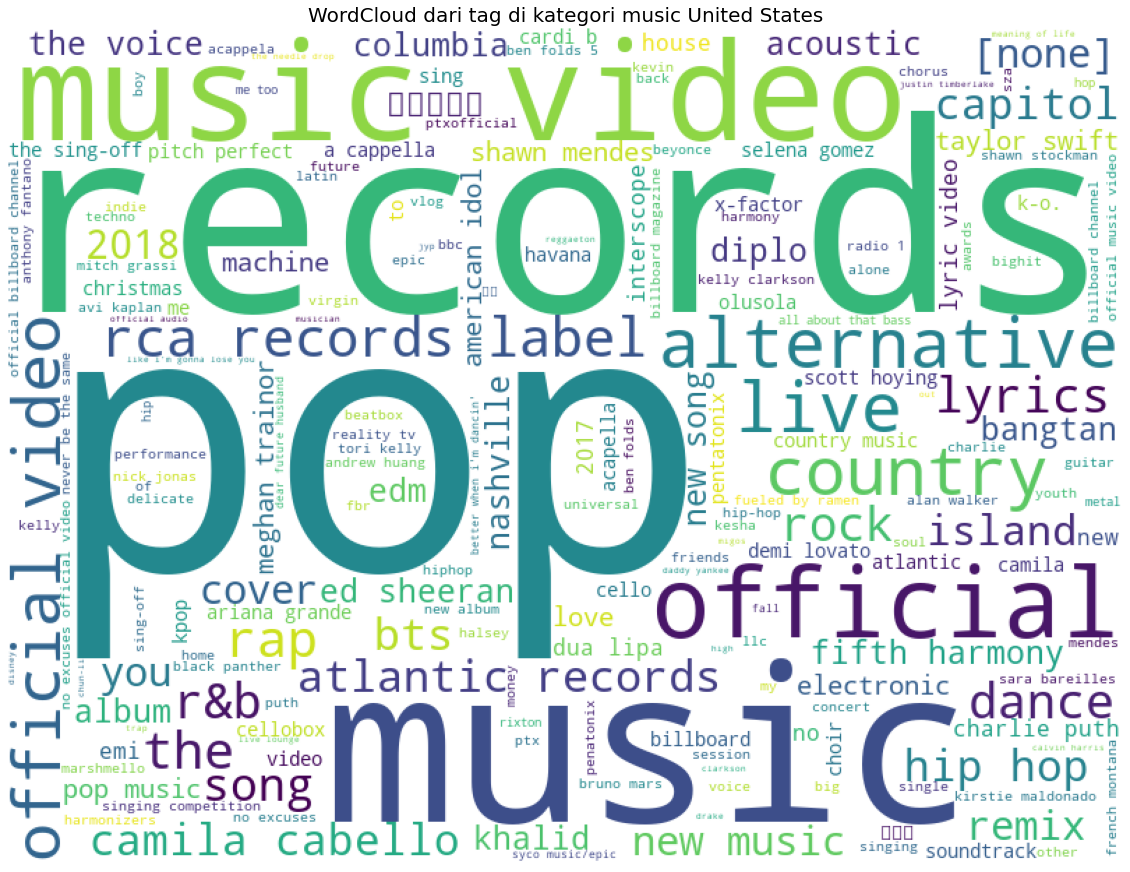

In [64]:
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud dari tag di kategori music United States", fontsize=20)

plt.show()

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## B. BOXPLOTTING ABSOLUTE VALUE BERDASARKAN KATEGORI DATA VIDEO UNITED STATES

Berikut adalah data jumlah viewer region United States apabila divisualisasikan dengan boxplot. Karena data terlalu beragam, outliernya terlalu tinggi dan tidak dapat dilihat dengan baik.

### 1B. Boxplotting Absolute Value Viewer Berdasarkan Kategori Data Video United States

In [65]:
# list jumlah views wilayah United States berdasarkan id pada dfUScategory
data_view_us_boxplot = [gUSvideo.get_group(items)['views'].values for items in dfUScategory['id']]

Text(0, 0.5, 'Jumlah Viewer')

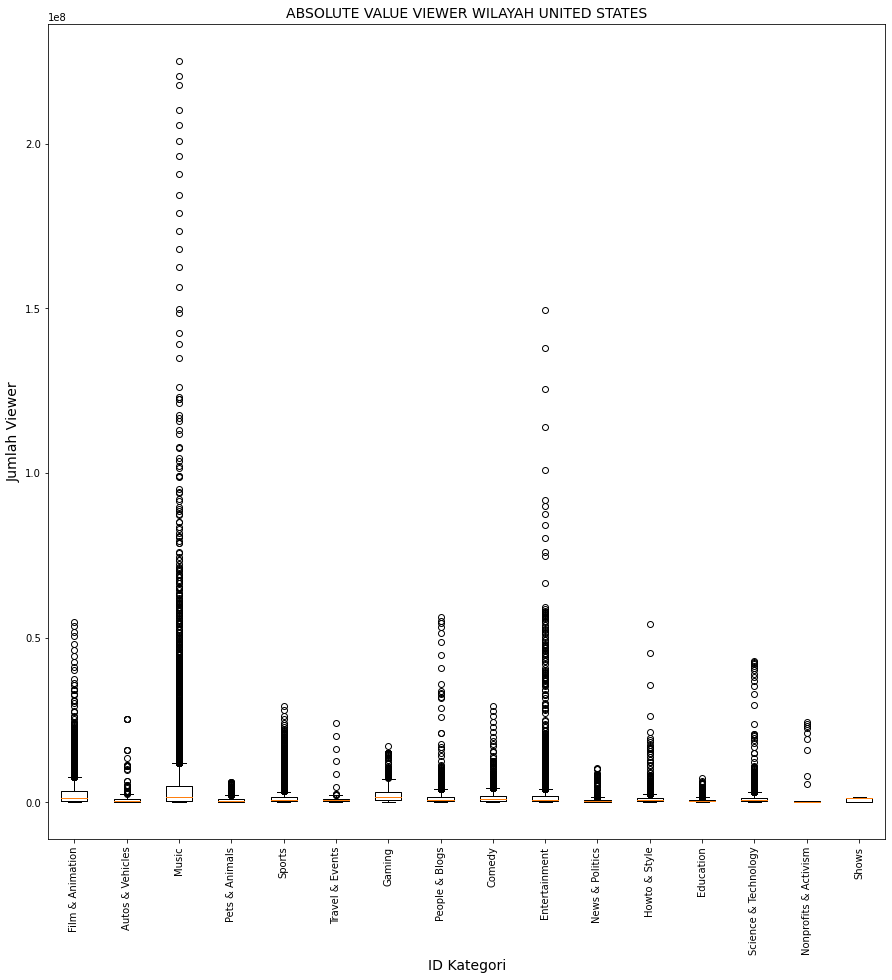

In [66]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_us_boxplot)

# penamaan x tick berdasarkan id kategori United States
ax.set_xticklabels(dfUScategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

Karena setelah dilakukan boxplotting outlier terlihat terlalu banyak maka diputuskan untuk dicoba dilakukan outlier removal dengan metode z-score dan IQR pada salah satu kategori yaitu Entertainment yang mana ada di urutan 9 pada array a.

#### Testing Z-Score Viewer Salah Satu Kategori Video United States Yaitu Entertainment

In [67]:
data_view_us_boxplot = {
    
    # id kategori
    'id' : [items for items in dfUScategory['id']],
    # nama kategori
    'category':[items for items in dfUScategory['category']],
    #penonton tertinggi
    'viewer':[gUSvideo.get_group(items)['views'].values for items in dfUScategory['id']],
    'median':[statistics.median(gUSvideo.get_group(items)['views'].values) for items in dfUScategory['id']]
}

dfViewUSboxplot = pd.DataFrame(data_view_us_boxplot)

# sort by median
dfViewUSboxplot = dfViewUSboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)

dfViewUSboxplot

id               category  \
0   20                 Gaming   
1   10                  Music   
2    1       Film & Animation   
3   43                  Shows   
4   23                 Comedy   
5   24          Entertainment   
6   22         People & Blogs   
7   28   Science & Technology   
8   17                 Sports   
9   26          Howto & Style   
10  19        Travel & Events   
11  15         Pets & Animals   
12  27              Education   
13   2       Autos & Vehicles   
14  25        News & Politics   
15  29  Nonprofits & Activism   

                                               viewer         median  
0   [154872, 161231, 224426, 463992, 55460, 686170... 1494142.000000  
1   [687582, 17158531, 13917, 57169, 60506, 328330... 1434128.000000  
2   [826059, 50867, 288922, 52591, 1751064, 273673... 1274578.000000  
3   [110112, 134433, 146353, 153469, 161347, 16652... 1155692.000000  
4   [3191434, 295639, 33980, 605932, 3358068, 1482...  980236.000000  
5   [2418783, 343168, 2095731, 2103417, 104578, 22...  734704.000000  
6   [748374, 98966, 321053, 197062, 2744430, 17770...  599139.000000  
7   [119180, 817732, 75752, 97007, 224019, 80705, ...  585748.000000  
8   [81377, 945, 956169, 4569, 1044813, 162597, 18...  559352.000000  
9   [145921, 120727, 1456472, 7224515, 484185, 300...  502783.000000  
10  [141148, 311621, 571588, 1037561, 403564, 1118...  494825.500000  
11  [207532, 45455, 284666, 426078, 46571, 279092,...  444501.500000  
12  [78044, 223871, 115791, 144418, 67429, 6412, 7...  419440.500000  
13  [98378, 7265, 4850, 704363, 341074, 93829, 551...  406278.000000  
14  [256426, 544770, 27943, 34785, 6473, 9132, 530...  244014.000000  
15  [1456, 1873, 2005, 2093, 1967, 2373, 2492, 705...   73649.000000

In [68]:
data_ent_us_view = {
    'viewer' : dfViewUSboxplot.loc[9, 'viewer'],
    'z-score' : stats.zscore(dfViewUSboxplot.loc[9, 'viewer'])
}

dfEntertainViewTest = pd.DataFrame(data_ent_us_view)

In [69]:
# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfEntertainViewTestz = dfEntertainViewTest[dfEntertainViewTest['z-score'] < 3]

dfEntertainViewTestz

viewer   z-score
0      145921 -0.434377
1      120727 -0.447439
2     1456472  0.245101
4      484185 -0.258998
5      300617 -0.354172
...       ...       ...
4141  2351845  0.709323
4142  2235021  0.648753
4143   982363 -0.000709
4144  1371236  0.200909
4145  1498679  0.266984

[4106 rows x 2 columns]

Text(0, 0.5, 'Jumlah Views')

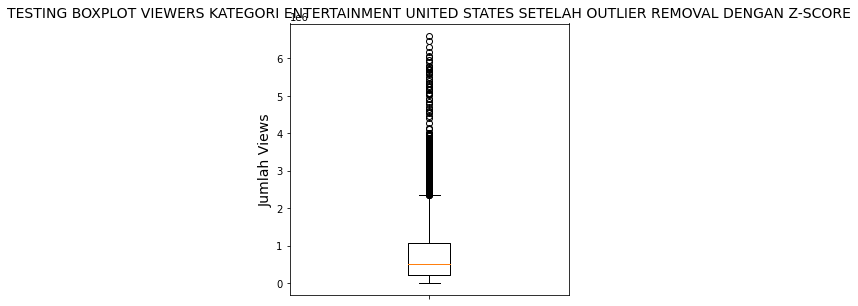

In [70]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTestz['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("TESTING BOXPLOT VIEWERS KATEGORI ENTERTAINMENT UNITED STATES SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan Z-Score masih terlihat bahwa outlier dianggap masih terlalu banyak hingga sulit untuk dibaca, maka diputuskan untuk mencoba dilakukan outlier removal dengan IQR

Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [71]:
Q1_test_ent_US = dfEntertainViewTest.viewer.quantile(0.25)
Q3_test_ent_US = dfEntertainViewTest.viewer.quantile(0.75)
IQR_test_ent_US = Q3_test_ent_US - Q1_test_ent_US
lower_test_ent_US = Q1_test_ent_US  - (1.5 * IQR_test_ent_US)
upper_test_ent_US =  Q3_test_ent_US + (1.5 * IQR_test_ent_US)

print("IQR Ent United States")
print("IQR =", IQR_test_ent_US)
print("Lower =", lower_test_ent_US)
print("Upper =", upper_test_ent_US)

IQR Ent United States
IQR = 882613.5
Lower = -1108498.0
Upper = 2421956.0


In [72]:
dfEntertainViewTest_IQRView = dfEntertainViewTest[(dfEntertainViewTest.viewer < upper_test_ent_US) & (dfEntertainViewTest.viewer > lower_test_ent_US)]

Text(0, 0.5, 'Jumlah Views')

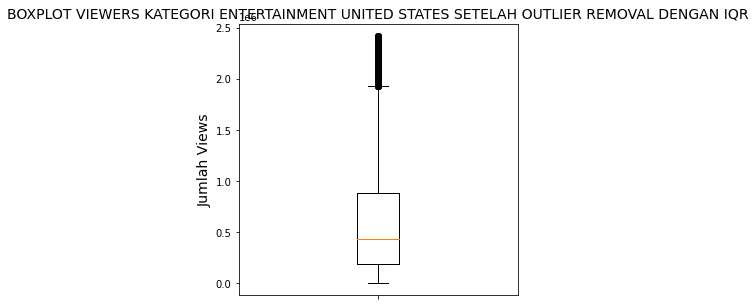

In [73]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTest_IQRView['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS KATEGORI ENTERTAINMENT UNITED STATES SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan IQR masih terlihat bahwa outlier masih cukup sulit untuk dibaca, di sini akhirnya diputuskan untuk <b>menampilkan boxplot tanpa outlier</b>.

Text(0, 0.5, 'Jumlah Viewer')

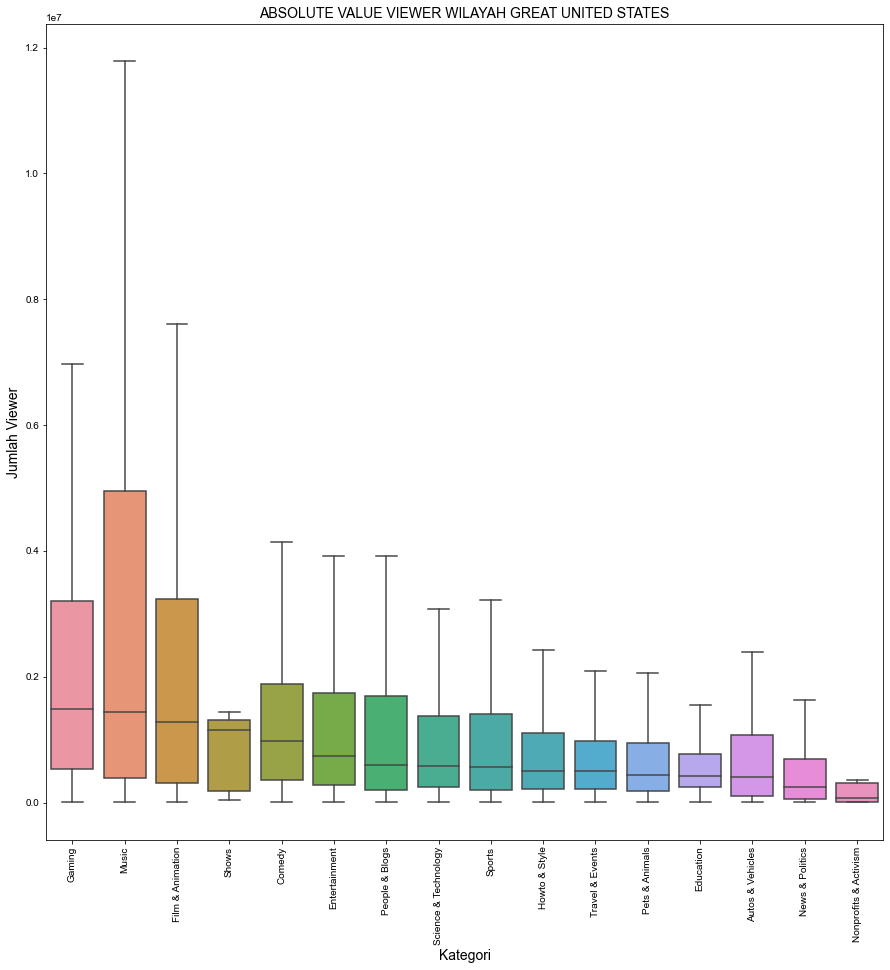

In [74]:
fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfViewUSboxplot['viewer'], showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfViewUSboxplot
ax.set_xticklabels(dfViewUSboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH GREAT UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 2B. Boxplotting Absolute Value Likes Berdasarkan Kategori Data Video United States

In [75]:
# membuat dataframe absolute value likes+median
data_likes_us_boxplot = {
    
    # id kategori
    'id' : [items for items in dfUScategory['id']],
    # nama kategori
    'category':[items for items in dfUScategory['category']],
    #penonton tertinggi
    'likes':[gUSvideo.get_group(items)['likes'].values for items in dfUScategory['id']],
    #median
    'median':[statistics.median(gUSvideo.get_group(items)['likes'].values) for items in dfUScategory['id']]
}

dfLikesUSboxplot= pd.DataFrame(data_likes_us_boxplot)

# sort by median
dfLikesUSboxplot = dfLikesUSboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)

Text(0, 0.5, 'Jumlah Viewer')

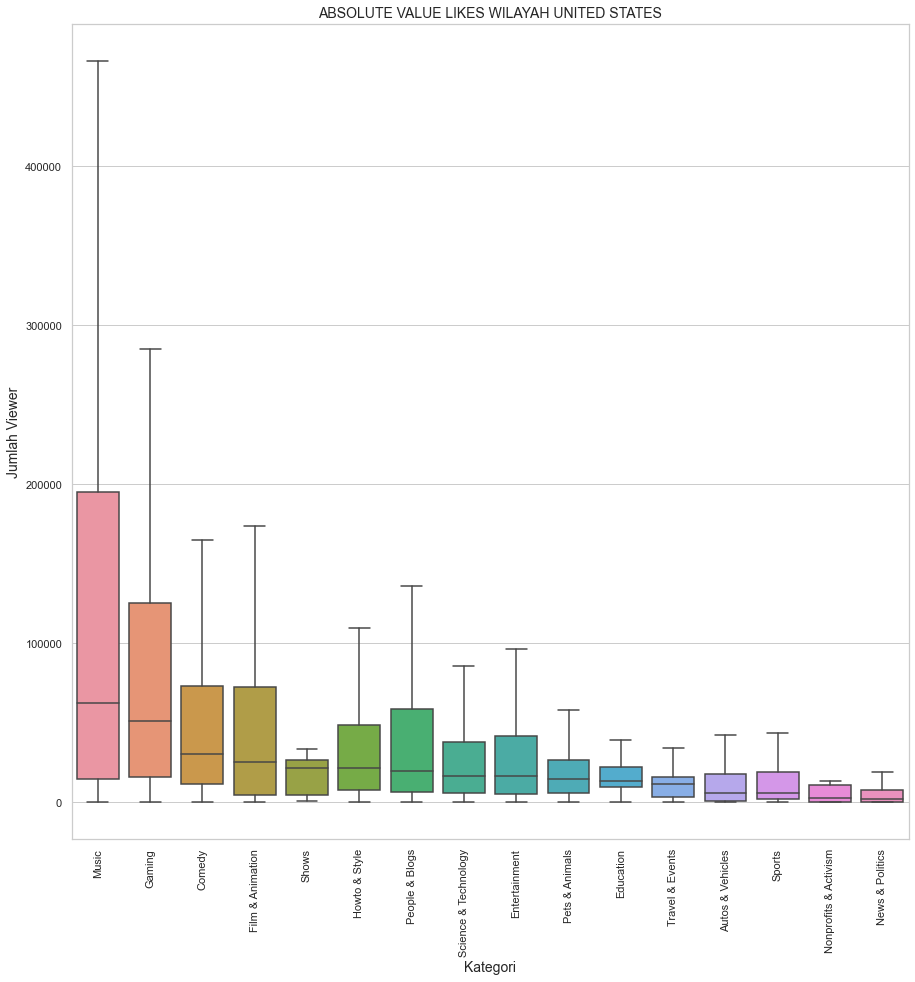

In [76]:
fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfLikesUSboxplot['likes'], showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfLikesUSboxplot
ax.set_xticklabels(dfLikesUSboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE LIKES WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 3B. Boxplotting Absolute Value Dislikes Berdasarkan Kategori Data Video United States

In [77]:
# membuat dataframe absolute value dislikes+median
data_dislikes_us_boxplot = {
    
    # id kategori
    'id' : [items for items in dfUScategory['id']],
    # nama kategori
    'category':[items for items in dfUScategory['category']],
    #penonton tertinggi
    'dislikes':[gUSvideo.get_group(items)['dislikes'].values for items in dfUScategory['id']],
    #median
    'median':[statistics.median(gUSvideo.get_group(items)['dislikes'].values) for items in dfUScategory['id']]
}

dfDislikesUSboxplot= pd.DataFrame(data_dislikes_us_boxplot)

# sort by median
dfDislikesUSboxplot = dfDislikesUSboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)

Text(0, 0.5, 'Jumlah Viewer')

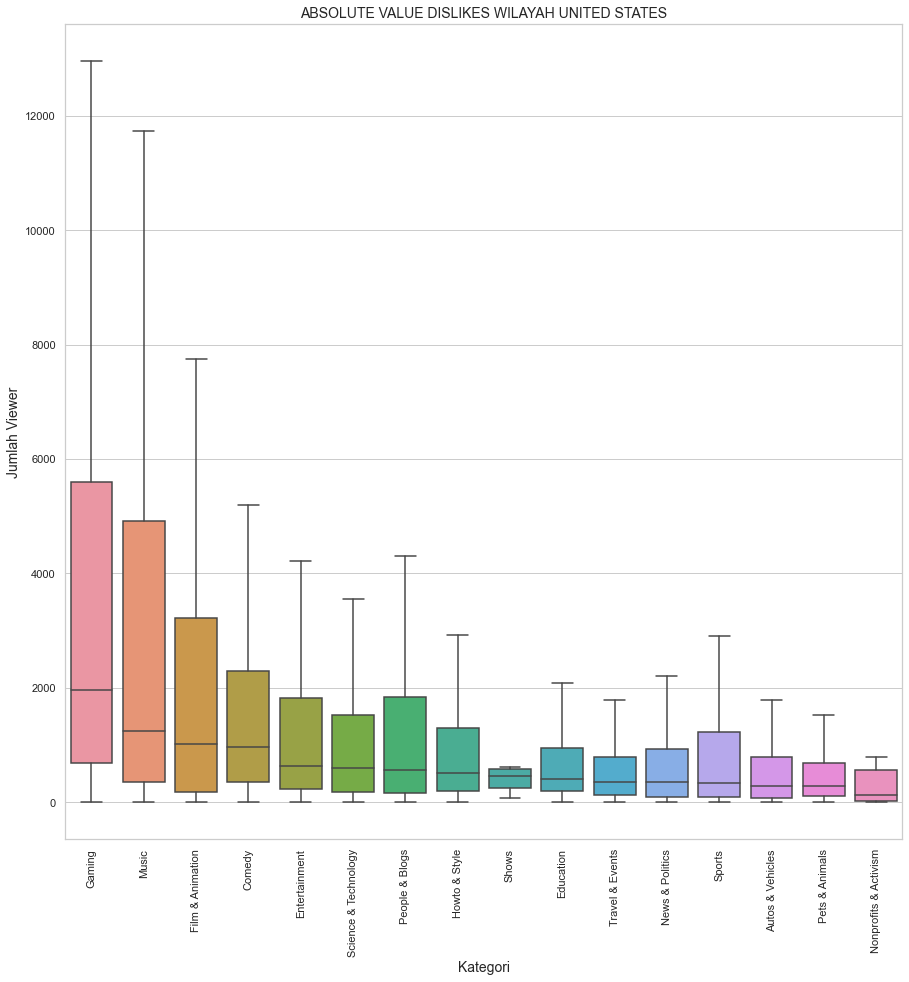

In [78]:
fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfDislikesUSboxplot['dislikes'], showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfDislikesUSboxplot
ax.set_xticklabels(dfDislikesUSboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE DISLIKES WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 4B. Boxplotting Absolute Value Jumlah Komentar Berdasarkan Kategori Data Video United States

In [79]:
# membuat dataframe absolute value comments+median
data_comments_us_boxplot = {
    
    # id kategori
    'id' : [items for items in dfUScategory['id']],
    # nama kategori
    'category':[items for items in dfUScategory['category']],
    #penonton tertinggi
    'comments':[gUSvideo.get_group(items)['comment_count'].values for items in dfUScategory['id']],
    #median
    'median':[statistics.median(gUSvideo.get_group(items)['comment_count'].values) for items in dfUScategory['id']]
}

dfCommentsUSboxplot= pd.DataFrame(data_comments_us_boxplot)

# sort by median
dfCommentsUSboxplot = dfCommentsUSboxplot.sort_values(by="median",ascending=False).reset_index(drop=True)

Text(0, 0.5, 'Jumlah Viewer')

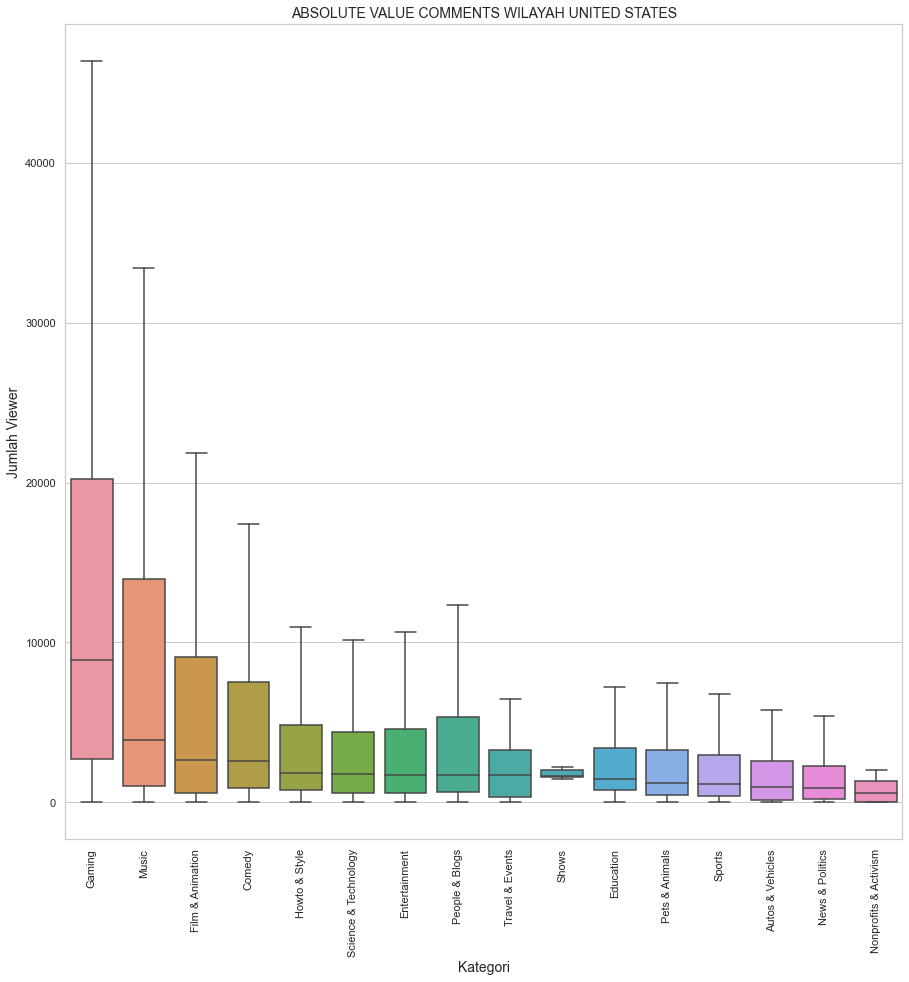

In [80]:
fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfCommentsUSboxplot['comments'], showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfCommentsUSboxplot
ax.set_xticklabels(dfCommentsUSboxplot['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE COMMENTS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## C. BOXPLOTTING RELATIVE VALUE BERDASARKAN KATEGORI DATA VIDEO UNITED STATES
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputuskan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.


<b>Operasinya adalah sebagai sebagai berikut :<br/>
- Jumlah Likes / Jumlah Views * 100<br/>
- Jumlah Dislikes / Jumlah Views * 100<br/>
- Jumlah Comments / Jumlah Views * 100<br/></b>

Untuk itu maka dataframe video perlu dimodifikasi dengan menghapus kolom yang tidak diperlukan dan menambahkan kolom baru dari setiap operasi yang dilakukan

In [81]:
# drop kolom yang tidak perlu
dfUS = dfUSvideos.drop([
    'trending_date','channel_title','publish_time','tags','thumbnail_link','comments_disabled','ratings_disabled',
  'video_error_or_removed','description'], axis=1)

In [82]:
# Menambah kolom likes/views
dfUS['likes/views(%)'] = dfUS['likes']/dfUS['views']*100

In [83]:
# Menambah kolom dislikes/views
dfUS['dislikes/views(%)'] = dfUS['dislikes']/dfUS['views']*100

In [84]:
# Menambah kolom comments/views
dfUS['comments/views(%)'] = dfUS['comment_count']/dfUS['views']*100

Berikut adalah data video United States setelah dimodifikasi. Dataframe ditambah kolom sebagai berikut :
<b>
- likes/views
- dislikes/views
- comments/views
</b>
semua dalam persen (%)

In [85]:
dfUS.head()

video_id                                              title  \
0  2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
2  5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
3  puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
4  d380meD0W0M                           I Dare You: GOING BALD!?   

   category_id    views   likes  dislikes  comment_count  likes/views(%)  \
0           22   748374   57527      2966          15954        7.686932   
1           24  2418783   97185      6146          12703        4.017930   
2           23  3191434  146033      5339           8181        4.575780   
3           24   343168   10172       666           2146        2.964146   
4           24  2095731  132235      1989          17518        6.309732   

   dislikes/views(%)  comments/views(%)  
0           0.396326           2.131822  
1           0.254095           0.525181  
2           0.167292           0.256342  
3           0.194074           0.625350  
4           0.094907           0.835890

Karena data video telah dimodifikasi, maka pengelompokan ulang berdasarkan id kategori perlu dilakukan kembali

In [86]:
gUSvideo = dfUS.groupby('category_id')

In [87]:
data_relative_views_us = {
    
    'id' : [items for items in dfUScategory['id']],
    'category' : [items for items in dfUScategory['category']],
    'likes/views(%)': [gUSvideo.get_group(items)['likes/views(%)'].values for items in dfUScategory['id']],
    'dislikes/views(%)': [gUSvideo.get_group(items)['dislikes/views(%)'].values for items in dfUScategory['id']],
    'comments/views(%)': [gUSvideo.get_group(items)['comments/views(%)'].values for items in dfUScategory['id']],
    'median_likes/views(%)': [statistics.median(gUSvideo.get_group(items)['likes/views(%)'].values) for items in dfUScategory['id']],
    'median_dislikes/views(%)': [statistics.median(gUSvideo.get_group(items)['dislikes/views(%)'].values) for items in dfUScategory['id']],
    'median_comments/views(%)': [statistics.median(gUSvideo.get_group(items)['comments/views(%)'].values) for items in dfUScategory['id']]
}

dfRelativeViewsUS = pd.DataFrame(data_relative_views_us)
dfRelativeViewsUS

id               category  \
0    1       Film & Animation   
1    2       Autos & Vehicles   
2   10                  Music   
3   15         Pets & Animals   
4   17                 Sports   
5   19        Travel & Events   
6   20                 Gaming   
7   22         People & Blogs   
8   23                 Comedy   
9   24          Entertainment   
10  25        News & Politics   
11  26          Howto & Style   
12  27              Education   
13  28   Science & Technology   
14  29  Nonprofits & Activism   
15  43                  Shows   

                                       likes/views(%)  \
0   [0.42890398869814383, 1.405626437572493, 2.601...   
1   [4.101526764113928, 1.2250516173434274, 0.4536...   
2   [16.607182852372517, 4.5890816643919, 9.470431...   
3   [3.6008904650849027, 5.0203497965020345, 5.759...   
4   [0.8048957322093465, 0.7407407407407408, 0.210...   
5   [1.1767789837617253, 0.7781888897089734, 0.067...   
6   [4.960870912753758, 4.839640019599209, 7.92421...   
7   [7.686931935101968, 2.5119738091869936, 1.3863...   
8   [4.575780041197781, 2.7097236832758873, 14.373...   
9   [4.017929677858659, 2.9641458411040658, 6.3097...   
10  [4.9347570059198365, 1.4406079629935569, 0.558...   
11  [1.1698110621500675, 7.48217051695147, 2.30042...   
12  [6.916611142432474, 3.761541244734691, 8.27870...   
13  [8.191810706494378, 2.8937353558378542, 12.433...   
14  [0.0, 0.0, 0.0, 0.0, 0.9659379766141332, 0.800...   
15  [3.221265620459169, 3.0349690924103454, 2.9217...   

                                    dislikes/views(%)  \
0   [0.014405750678825604, 0.4678868421569977, 0.2...   
1   [0.5031612758950172, 0.11011699931176876, 0.02...   
2   [0.19386778595134835, 0.25305196581222483, 0.1...   
3   [0.11853593662664072, 0.07699923000769993, 0.0...   
4   [0.030721211153028498, 0.5291005291005291, 0.2...   
5   [0.04959333465582226, 0.04653088206507264, 0.0...   
6   [0.10589389947827885, 0.10481855226352253, 0.1...   
7   [0.39632590122051276, 0.1859224380090132, 0.55...   
8   [0.1672915686177436, 0.21580373360754165, 0.15...   
9   [0.2540947244957485, 0.194074039537486, 0.0949...   
10  [0.5315373636058746, 0.21495309947317218, 0.12...   
11  [0.39610474160675985, 0.18554258782211103, 0.1...   
12  [0.06791040951258265, 0.0853169905883299, 0.06...   
13  [0.42876321530458134, 0.09514119540387314, 0.0...   
14  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0401284109149...   
15  [0.16346992153443765, 0.15026072467325732, 0.1...   

                                    comments/views(%)  median_likes/views(%)  \
0   [0.041159287653787444, 0.4836141309689975, 0.7...               2.312898   
1   [0.49401288906056234, 0.30282174810736406, 0.0...               1.582370   
2   [1.2174547908467643, 0.7336408926848109, 0.546...               3.940030   
3   [1.0215292099531639, 0.037399626003739965, 0.3...               3.079446   
4   [0.21750617496344177, 0.8465608465608466, 0.15...               1.075180   
5   [0.1672003854110579, 0.14921972524316396, 0.01...               1.909217   
6   [1.1196342786300946, 0.9173173893357978, 1.230...               3.389765   
7   [2.131821789639939, 0.537558353373886, 0.27877...               3.552446   
8   [0.2563424466869752, 0.4248424598919628, 0.688...               3.835135   
9   [0.5251814652244537, 0.6253496829541216, 0.835...               2.280318   
10  [0.9234632993534198, 0.7307671127264717, 0.297...               0.849979   
11  [0.4612084621130612, 1.1149121571810778, 0.148...               4.302063   
12  [0.4933114653272513, 0.5422765789226832, 2.418...               3.606371   
13  [1.203222017116966, 0.4196974069744122, 1.6237...               2.629401   
14  [0.0, 0.0, 0.0, 0.0, 0.1525165226232842, 0.126...               3.308173   
15  [1.295045045045045, 1.2236578816213282, 1.1793...               2.212571   

    median_dislikes/views(%)  median_comments/views(%)  
0                   0.083050                  0.250707  
1                   0.07649

### 1C. Boxplotting Relative Value Likes/Views Data Video United States

#### Berikut adalah hasil boxplot jumlah likes terhadap jumlah views di United States

Text(0, 0.5, 'Jumlah Viewer')

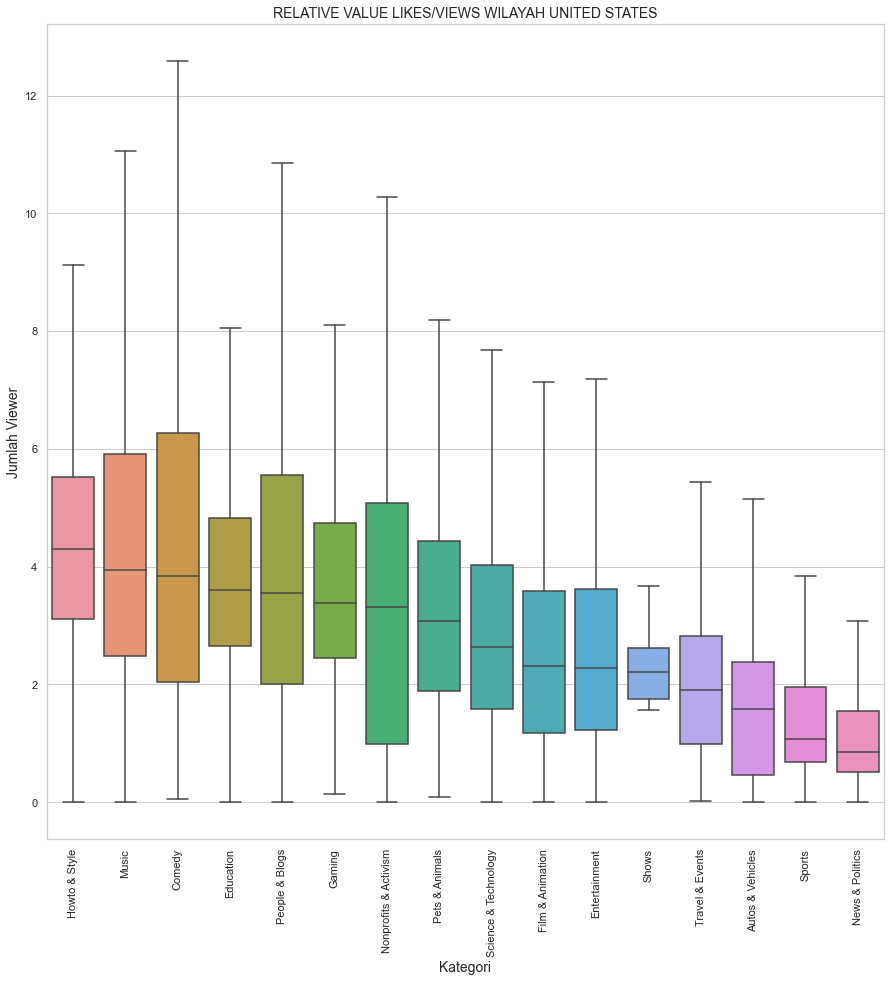

In [88]:
# sorting
dfRelativeViewsUS_sortLikes = dfRelativeViewsUS.sort_values(by="median_likes/views(%)",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfRelativeViewsUS_sortLikes['likes/views(%)'].values, showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfRelativeViewsUS
ax.set_xticklabels(dfRelativeViewsUS_sortLikes['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE LIKES/VIEWS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 2C. Boxplotting Relative Value Dislikes/Views Data Video United States

#### Berikut adalah hasil boxplot jumlah dislikes terhadap jumlah views di United States

Text(0, 0.5, 'Jumlah Viewer')

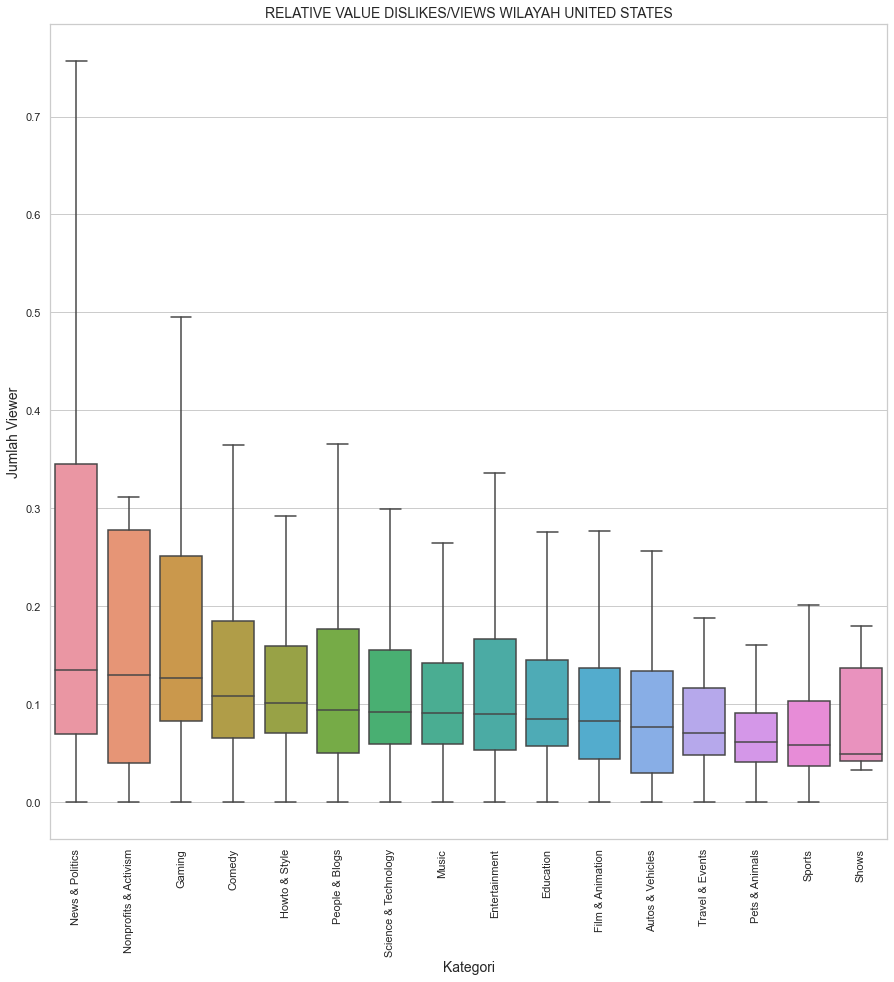

In [89]:
# sorting
dfRelativeViewsUS_sortDislikes = dfRelativeViewsUS.sort_values(by="median_dislikes/views(%)",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfRelativeViewsUS_sortDislikes['dislikes/views(%)'].values, showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfRelativeViewsUS
ax.set_xticklabels(dfRelativeViewsUS_sortDislikes['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE DISLIKES/VIEWS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

Text(0, 0.5, 'Jumlah Viewer')

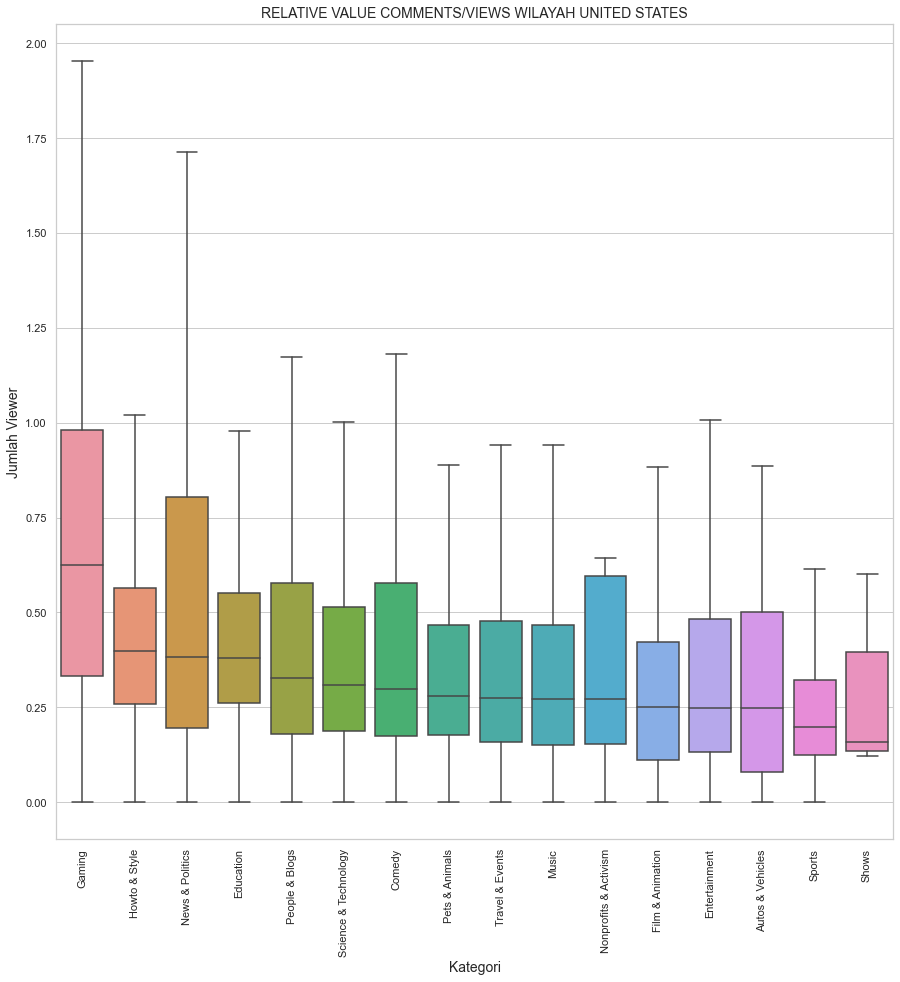

In [90]:
# sorting
dfRelativeViewsUS_sortComments = dfRelativeViewsUS.sort_values(by="median_comments/views(%)",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfRelativeViewsUS_sortComments['comments/views(%)'].values, showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfRelativeViewsUS
ax.set_xticklabels(dfRelativeViewsUS_sortComments['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE COMMENTS/VIEWS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></b>

## MENCARI PENYEBAB FIRST TRENDING DI UNITED STATES

Di sini masing-masing datasets dari setiap region ditransform ulang dengan hanya mencantumkan data video pada saat pertama kali video tersebut mengalami trend

Dataframe baru dibuat dari masing-masing datasets dengan <b>grouping by video_id</b> lalu digunakan <b>loc</b> untuk melokasikan data berdasarkan index, lalu yang dicari adalah trending_date pertama kali, <b>maka dicari index terkecil dari masing-masing video_id berdasarkan trending_datenya dengan menggunakan idxmin()</b>

In [91]:
dfUSvideosFirstTrend = dfUSvideos.loc[dfUSvideos.groupby('video_id')['trending_date'].idxmin()][['video_id','trending_date','title','channel_title','category_id','publish_time','tags','views','likes','dislikes','comment_count']]

### Sorting

Dilakukan reindex untuk masing-masing dataframe berdasarkan video_id dan trending_date nya

In [92]:
dfUSvideosFirstTrend = dfUSvideosFirstTrend.sort_values(by=['video_id','trending_date']).reset_index(drop=True)

#### DATA VIDEO FIRST TREND UNITED STATES

Berikut adalah contoh dataframe video United States setelah dimodifikasi dengan hanya menampilkan data-data video saat pertama kali masuk trending

In [93]:
dfUSvideosFirstTrend.head()

video_id trending_date  \
0  -0CMnp02rNY    2018-06-06   
1  -0NYY8cqdiQ    2018-02-01   
2  -1Hm41N0dUs    2018-04-29   
3  -1yT-K3c6YI    2017-11-29   
4  -2RVw2_QyxQ    2017-11-14   

                                               title           channel_title  \
0  Mindy Kaling's Daughter Had the Perfect Reacti...            TheEllenShow   
1  Megan Mullally Didn't Notice the Interesting P...            TheEllenShow   
2  Cast of Avengers: Infinity War Draws Their Cha...       Jimmy Kimmel Live   
3  YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...             Molly Burke   
4                     2017 Champions Showdown: Day 3  Saint Louis Chess Club   

   category_id              publish_time  \
0           24  2018-06-04T13:00:00.000Z   
1           24  2018-01-29T14:00:39.000Z   
2           23  2018-04-27T07:30:02.000Z   
3           22  2017-11-28T18:30:43.000Z   
4           27  2017-11-12T02:39:01.000Z   

                                                tags    views  likes  \
0  ellen|"ellen degeneres"|"the ellen show"|"elle...   475965   6531   
1  megan mullally|"megan"|"mullally"|"will and gr...   563746   4429   
2  jimmy|"jimmy kimmel"|"jimmy kimmel live"|"late...  1566807  32752   
3  youtube quiz|"youtuber quiz"|"truth or dare"|"...   129360   5214   
4                         Chess|"Saint Louis"|"Club"    67429    438   

   dislikes  comment_count  
0       172            271  
1        54             94  
2       393           1490  
3       108            516  
4        23             23

### Boxplotting Viewer Data Video First Trend United States

Text(0, 0.5, 'Jumlah Views')

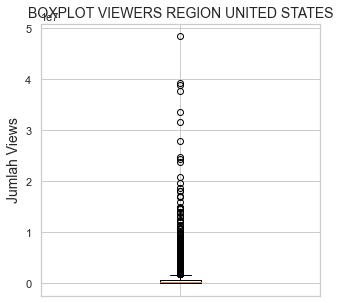

In [94]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing IQR Viewer Data Video First Trend United States
Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

1. Mengurutkan data dari yang terendah

In [95]:
dfUSvideosFirstTrendSortViews = dfUSvideosFirstTrend.sort_values(by=['views'])

2. Menghitung Q1 (kuartil 1)

In [96]:
Q1_USFirstTrendView = dfUSvideosFirstTrendSortViews.views.quantile(0.25)

3. Menghitung Q3 (kuartil 3)

In [97]:
Q3_USFirstTrendView = dfUSvideosFirstTrendSortViews.views.quantile(0.75)

4. Menghitung IQR = (Q3 - Q1)

In [98]:
IQR_USFirstTrendView = Q3_USFirstTrendView - Q1_USFirstTrendView

5. Menemukan range bawah data = Q1 -(1.5 * IQR)

In [99]:
lower_USFirstTrendView = Q1_USFirstTrendView - (1.5 * IQR_USFirstTrendView)

6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [100]:
upper_USFirstTrendView =  Q3_USFirstTrendView + (1.5 * IQR_USFirstTrendView)

<b>Berikut adalah hasil perhitungan yang telah dilakukan di atas</b>

In [101]:
print("IQR United States")
print("IQR =", IQR_USFirstTrendView)
print("Lower =", lower_USFirstTrendView)
print("Upper =", upper_USFirstTrendView)

IQR United States
IQR = 667755.5
Lower = -918122.25
Upper = 1752899.75


In [102]:
dfUSvideosFirstTrend_IQRView = dfUSvideosFirstTrendSortViews[(dfUSvideosFirstTrendSortViews.views < upper_USFirstTrendView) & (dfUSvideosFirstTrendSortViews.views > lower_USFirstTrendView)]

Text(0, 0.5, 'Jumlah Views')

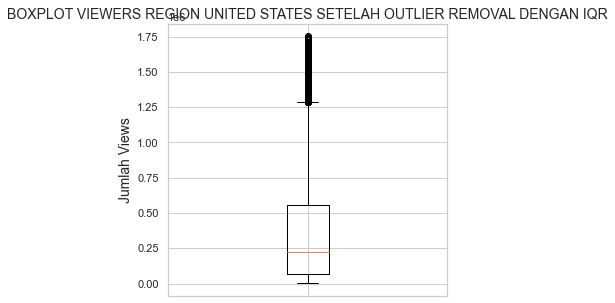

In [103]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_IQRView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Di sini coba dilakukan boxplotting tanpa menampilkan outlier

Text(0, 0.5, 'Jumlah Views')

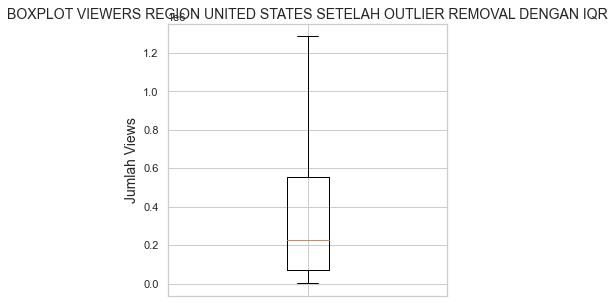

In [104]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_IQRView['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Text(0, 0.5, 'Jumlah Views')

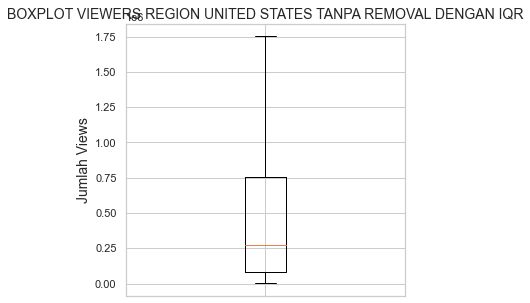

In [105]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES TANPA REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME FIRST TREND VIDEO UNITED STATES

In [106]:
# mengelompokan ulang dataframe videosFirstTrend berdasarkan id kategori
gUSVideoFtrend = dfUSvideosFirstTrend.groupby('category_id')

Membuat dataframe baru yang memiliki kolom id, category yang diambil dari dfUScategory, dan views yang diambil dari hasil pengelompokkan berdasarkan category_id

In [107]:
data_ftrend_views_us = {
    
    'id' : [items for items in dfUScategory['id']],
    'category' : [items for items in dfUScategory['category']],
    'views': [gUSVideoFtrend.get_group(items)['views'].values for items in dfUScategory['id']],
    'median_views': [statistics.median(gUSVideoFtrend.get_group(items)['views'].values) for items in dfUScategory['id']]
}

dfFtrendViewsUS = pd.DataFrame(data_ftrend_views_us)
dfFtrendViewsUS

id               category  \
0    1       Film & Animation   
1    2       Autos & Vehicles   
2   10                  Music   
3   15         Pets & Animals   
4   17                 Sports   
5   19        Travel & Events   
6   20                 Gaming   
7   22         People & Blogs   
8   23                 Comedy   
9   24          Entertainment   
10  25        News & Politics   
11  26          Howto & Style   
12  27              Education   
13  28   Science & Technology   
14  29  Nonprofits & Activism   
15  43                  Shows   

                                                views  median_views  
0   [4427381, 60262, 30690, 89872, 325769, 1613498... 371256.500000  
1   [83525, 29017, 10477, 206006, 6491, 33447, 967... 169927.500000  
2   [1012527, 545655, 390631, 296615, 497161, 4843... 360001.000000  
3   [908989, 566146, 45455, 98042, 532201, 31273, ... 155168.500000  
4   [703371, 2863, 385104, 1815030, 252542, 687, 8... 305899.000000  
5   [12468, 285129, 84056, 59758, 494687, 16207, 4... 185495.500000  
6   [48735, 476387, 2341772, 2079137, 6191, 650855... 652300.000000  
7   [129360, 720476, 3438, 102560, 1331385, 430483... 224029.000000  
8   [1566807, 363370, 1371506, 327936, 735146, 152... 468522.000000  
9   [475965, 563746, 744363, 497085, 23877, 335817... 319412.000000  
10  [84744, 230360, 45970, 113435, 310910, 212414,...  84428.000000  
11  [249601, 484189, 345365, 799107, 127481, 14286... 242099.000000  
12  [67429, 251579, 261506, 278088, 21740, 169468,... 230944.500000  
13  [296237, 106360, 994662, 96404, 765436, 643051... 236786.000000  
14  [1967, 7052, 23634, 4178, 5579079, 225051, 145...  28775.500000  
15                    [657183, 36609, 765531, 110112] 383647.500000

Text(0, 0.5, 'Jumlah Viewer')

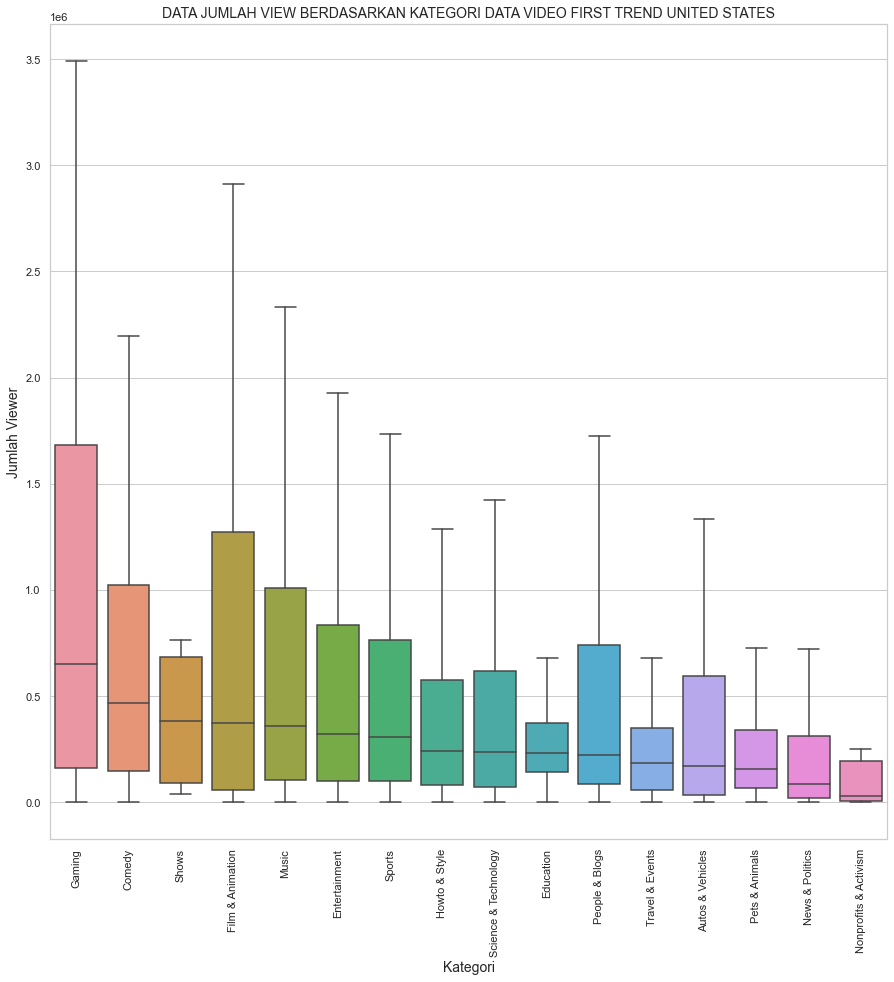

In [108]:
# sort
dfFtrendViewsUS_sort = dfFtrendViewsUS.sort_values(by="median_views",ascending=False)

fig = plt.figure(1, figsize=(15, 15))

ax = sns.boxplot(data = dfFtrendViewsUS_sort['views'].values, showfliers = False)
sns.set(style="whitegrid")

# penamaan x tick berdasarkan id kategori dfFtrendViewsUS_sort
ax.set_xticklabels(dfFtrendViewsUS_sort['category'], rotation='vertical')

# penamaan judul
plt.title("DATA JUMLAH VIEW BERDASARKAN KATEGORI DATA VIDEO FIRST TREND UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

##  D. BOXPLOTTING RELATIVE VALUE DATA VIDEO FIRST TREND UNITED STATES
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputuskan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.

In [109]:
# Menambah kolom likes/views
dfUSvideosFirstTrend['likes/views(%)'] = dfUSvideosFirstTrend['likes']/dfUSvideosFirstTrend['views']*100

In [110]:
# Menambah kolom dislikes/views
dfUSvideosFirstTrend['dislikes/views(%)'] = dfUSvideosFirstTrend['dislikes']/dfUSvideosFirstTrend['views']*100

In [111]:
# Menambah kolom comments/views
dfUSvideosFirstTrend['comments/views(%)'] = dfUSvideosFirstTrend['comment_count']/dfUSvideosFirstTrend['views']*100

### 1D. Plotting Likes/Views % First Trend United States

Text(0, 0.5, 'LIKES TERHADAP VIEWS')

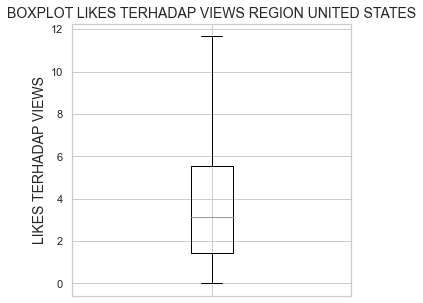

In [112]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['likes/views(%)'].values, showfliers = False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

### 2D. Plotting Disikes/Views % First Trend United States

Text(0, 0.5, 'DISLIKES TERHADAP VIEWS')

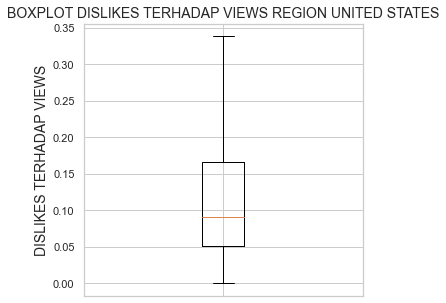

In [113]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['dislikes/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT DISLIKES TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("DISLIKES TERHADAP VIEWS", fontsize=14)

### 3D. Plotting Comments/Views % First Trend

Text(0, 0.5, 'COMMENTS TERHADAP VIEWS')

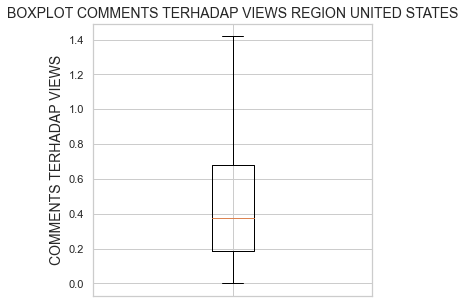

In [114]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['comments/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT COMMENTS TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("COMMENTS TERHADAP VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## MENCARI MACAM-MACAM TOP 5

## TOP 5 KATEGORI DENGAN JUMLAH VIDEO TERTINGGI & TERENDAH YANG MASUK TRENDING DI UNITED STATES

Untuk mencari top 5 kategori dengan jumlah video tertinggi dan terendah yang masuk trending, maka dataframe baru yang menampilkan berapa banyak video yang masuk trend berdasarkan kategori perlu untuk dibuat.

In [115]:
data_count_category_us = {

    'id' : [items for items in dfUScategory['id']],
    'category' : [items for items in dfUScategory['category']],
    'video_count': [gUSvideo.get_group(items)['category_id'].count() for items in dfUScategory['id']]
}

dfCatCountUS = pd.DataFrame(data_count_category_us)

print("JUMLAH VIDEO YANG TRENDING BERDASARKAN KATEGORI UNITED STATES")
dfCatCountUS

JUMLAH VIDEO YANG TRENDING BERDASARKAN KATEGORI UNITED STATES


id               category  video_count
0    1       Film & Animation         2345
1    2       Autos & Vehicles          384
2   10                  Music         6472
3   15         Pets & Animals          920
4   17                 Sports         2174
5   19        Travel & Events          402
6   20                 Gaming          817
7   22         People & Blogs         3210
8   23                 Comedy         3457
9   24          Entertainment         9964
10  25        News & Politics         2487
11  26          Howto & Style         4146
12  27              Education         1656
13  28   Science & Technology         2401
14  29  Nonprofits & Activism           57
15  43                  Shows           57

### 1. TOP 5 KATEGORI DENGAN JUMLAH VIDEO TERTINGGI YANG TRENDING DI UNITED STATES

In [116]:
#sorting tertinggi
top5us_count_high = dfCatCountUS.nlargest(5, "video_count")

#reindex dari 1
top5us_count_high.index = np.arange(1, len(top5us_count_high) + 1)

print("TOP 5 KATEGORI DENGAN JUMLAH VIDEO TERTINGGI YANG TRENDING DI UNITED STATES")
top5us_count_high

TOP 5 KATEGORI DENGAN JUMLAH VIDEO TERTINGGI YANG TRENDING DI UNITED STATES


id        category  video_count
1  24   Entertainment         9964
2  10           Music         6472
3  26   Howto & Style         4146
4  23          Comedy         3457
5  22  People & Blogs         3210

### 2. TOP 5 KATEGORI DENGAN VIDEO TERENDAH YANG TRENDING DI UNITED STATES

In [117]:
#sorting terendah
top5us_count_low = dfCatCountUS.sort_values('video_count').head(5)

#reindex dari 1
top5us_count_low.index = np.arange(1, len(top5us_count_low) + 1)

print("TOP 5 KATEGORI DENGAN JUMLAH VIDEO TERENDAH YANG TRENDING DI UNITED STATES")
top5us_count_low

TOP 5 KATEGORI DENGAN JUMLAH VIDEO TERENDAH YANG TRENDING DI UNITED STATES


id               category  video_count
1  29  Nonprofits & Activism           57
2  43                  Shows           57
3   2       Autos & Vehicles          384
4  19        Travel & Events          402
5  20                 Gaming          817

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 KATEGORI BERDASARKAN AVERAGE VIEW DI UNITED STATES

Untuk mencari top 5 kategori video tertinggi dan terendah berdasarkan average view untuk tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa average view berdasarkan kategori perlu untuk dibuat.

In [118]:
data_avgview_category_us = {
    
    'id' : [items for items in dfUScategory['id']],
    'category' : [items for items in dfUScategory['category']],
    'average_views': [gUSvideo.get_group(items)['views'].mean() for items in dfUScategory['id']]
}

dfCatAvgViewUS = pd.DataFrame(data_avgview_category_us)

### 1. Top 5 Kategori Dengan Average Views Tertinggi di United States

In [119]:
#sorting tertinggi
top5US_avgview_high = dfCatAvgViewUS.nlargest(5, "average_views")

#reindex dari 1
top5US_avgview_high.index = np.arange(1, len(top5US_avgview_high) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI UNITED STATES")
top5US_avgview_high

TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI UNITED STATES


id               category  average_views
1  10                  Music 6201003.119592
2   1       Film & Animation 3106250.200853
3  29  Nonprofits & Activism 2963884.070175
4  20                 Gaming 2620830.630355
5  24          Entertainment 2067883.199016

### 2. Top 5 Kategori Dengan Average Views Terendah di United States

In [120]:
#sorting terendah
top5US_avgview_low = dfCatAvgViewUS.sort_values('average_views').head(5)

#reindex dari 1
top5US_avgview_low.index = np.arange(1, len(top5US_avgview_low) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI UNITED STATES")
top5US_avgview_low

TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI UNITED STATES


id         category  average_views
1  25  News & Politics  592587.737837
2  27        Education  712940.815217
3  15   Pets & Animals  831143.466304
4  19  Travel & Events  854619.611940
5  43            Shows  903527.333333

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL DENGAN VIEWER TERBANYAK DI UNITED STATES

In [121]:
#membuat dataframe baru dengan sum yang menghitung total viewer berdasarkan channel_title dalam datasets dfUSvideos
dfChannelViewUS = dfUSvideos.groupby(['channel_title'])['views'].sum().reset_index()

#melakukan sorting berdasarkan views
dfChannelViewUS.sort_values(by="views", inplace = True, ascending = False)

#reset index dari 1
dfChannelViewUS.reset_index(drop = True, inplace = True)
dfChannelViewUS.index = dfChannelViewUS.index + 1

dfChannelViewUS.head(5)

channel_title       views
1   ChildishGambinoVEVO  3758488765
2               ibighit  2235906679
3          Dude Perfect  1870085178
4  Marvel Entertainment  1808998971
5      ArianaGrandeVevo  1576959172

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL YANG PALING SERING MASUK DAILY TRENDING DI UNITED STATES

Untuk mencari top 5 channel yang <b>paling sering masuk</b> daily trending di tiap wilayah + berapa <b>total viewernya</b>, maka dataframe baru yang menampilkan berapa kali channel muncul di datasets videos masing-masing wilayah perlu untuk dibuat, kemudian dimerge dengan dataframe baru juga yang menampilkan berapa jumlah total viewer tiap channel yang videonya pernah masuk ke dalam daily trending.

In [122]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali channel_title muncul dalam datasets dfUSvideos
dfChannelCountUS = pd.DataFrame(dfUSvideos.channel_title.value_counts().reset_index())

#reset index dari 1
dfChannelCountUS.index = dfChannelCountUS.index + 1

#rename kolom
dfChannelCountUS.columns = ['channel_title', 'trending_count']

dfChannelCountUS.head(5)

channel_title  trending_count
1                                    ESPN             203
2  The Tonight Show Starring Jimmy Fallon             197
3                                     Vox             193
4                                 Netflix             193
5                            TheEllenShow             193

In [123]:
#membuat dataframe baru yang merupakan hasil merge dari dfChannelCountUS dan dfChannelViewUS berdasarkan channel_title
dfTop5ChannelUS = pd.merge(dfChannelCountUS,dfChannelViewUS, on="channel_title").reset_index(drop = True)

#melakukan index ulang dari angka 1
dfTop5ChannelUS.index = dfTop5ChannelUS.index + 1      

print("TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI UNITED STATES")
dfTop5ChannelUS.head(5)

TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI UNITED STATES


channel_title  trending_count      views
1                                    ESPN             203  105654218
2  The Tonight Show Starring Jimmy Fallon             197  271426383
3                                     Vox             193  122633963
4                                 Netflix             193  185818315
5                            TheEllenShow             193  253841999

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 VIDEO YANG PALING SERING MASUK DAILY TRENDING UNITED STATES

Untuk mencari top 5 video yang paling sering masuk daily trending di tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa kali video muncul di datasets Videos tersebut perlu untuk dibuat.

#### Di sini size() digunakan untuk menghitung suatu elemen pada dataframe, tetapi jika size() dikombinasikan dengan groupby() , maka size akan bertindak seperti count() yang menghitung kolom yang di-groupby-kan

In [124]:
#membuat dataframe baru dengan size() yang menghitung berapa kali video_id & title muncul dalam datasets dfUSvideos
dfTop5VideoUS = dfUSvideos.groupby(["video_id", "title","category_id"]).size().reset_index(name="count")

#sorting berdasarkan count
dfTop5VideoUS.sort_values(by="count", inplace = True, ascending = False)

#reset index dari 1
dfTop5VideoUS.reset_index(drop = True, inplace = True)
dfTop5VideoUS.index = dfTop5VideoUS.index + 1

print("TOP 5 VIDEO YANG MASUK DAILY TRENDING DI UNITED STATES")
dfTop5VideoUS.head(5)

TOP 5 VIDEO YANG MASUK DAILY TRENDING DI UNITED STATES


video_id                                              title  \
1  j4KvrAUjn6c         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
2  iILJvqrAQ_w                Charlie Puth - BOY [Official Audio]   
3  t4pRQ0jn23Q  YoungBoy Never Broke Again Goes Sneaker Shoppi...   
4  r-3iathMo7o               The ULTIMATE $30,000 Gaming PC Setup   
5  8h--kFui1JA        Sam Smith - Pray (Official Video) ft. Logic   

   category_id  count  
1           24     30  
2           10     29  
3           24     29  
4           28     29  
5           10     29